# 1 . DESCRIPCION Y ENFOQUE DEL PROBLEMA

**ABSTRACTO. PRESENTACION DEL PROYECTO:** 

Modelo de deteccion de Fraudes 

En consonancia con mi profesión y buscando acercar la ciencia de datos a un terreno que conozco mejor, he decidido crear un modelo que permita el análisis de múltiples variables para lograr determinar si se trata de una operación fraudulenta o no.
De esta forma, comprenderemos cuáles son las variables determinantes para la actividad criminal, donde poner el ojo en cada negocio y finalmente, generar insights que permitan persecuciones judiciales de mayor eficiencia.


**MOTIVACION**

Me motiva trabajar este tópico el haber transitado por la ineficacia preventiva e investigativa de nuestro sistema a la merced de inescrupulosos dispuestos a aprovecharse de toda persona vulnerable. La mejora de nuestro modelo, eventualmente permitirá impedir que tengan lugar crímenes que resultan devastadores para muchas personas y sus familias. 
Junto a este trabajo se realizará un breve artículo de doctrina penal analizando la posibilidad de utilizar el procedimiento de flagrancia del Código Procesal Penal Argentino o métodos similares que brinden mayor agilidad, basados en la detección de comportamientos de fraude y de esta manera observar el hecho delictivo cuando en el momento en que está ocurriendo. 
Todo esto, con miras a lograr disminuir los tiempos procesales y la complejidad probatoria involucrada.


**AUDIENCIA**

La audiencia a la cual apunta el modelo es el sector privado de e-commerce o fintech. Asimismo, existe la posibilidad de que esto sirva para trabajar conjuntamente con el sector público en las metodologías investigativas anteriormente descriptas.




# 2 . DATA ADQUISITION


In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Python/fraud.csv')

In [ ]:
df1

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

# 3 . STORY INTRODUCTION

In [ ]:
is_fraud = df1.loc[:, 'is_fraud'] == 1
df_fraud = df1.loc[is_fraud]

Para entender las implicancias del fraude en nuestra sociedad, debemos poner nuestra lupa sonbre cada caso. Para ello, ordenamos nuestro dataset de manera ascendente para conocer al afectado mas antiguo. Desde ese punto, intentaremos conocer su historia a traves de los datos que figuran en el mismo.

In [ ]:
df_fraud.sort_values(by = ['dob'],  
                      axis=0, 
                      ascending=True, 
                      inplace=False, 
                      kind='quicksort', 
                      na_position='last', 
                      ignore_index=False)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
121888,121888,2020-08-03 01:48:07,2358122155477959,fraud_Kiehn-Emmerich,grocery_pos,337.71,Mike,Tran,M,17355 Mendoza Bypass Suite 059,...,39.2092,-76.6681,9784,"Conservator, furniture",1924-10-30,1d629d8f67a23b4a77c14762264e842a,1375494487,38.650523,-77.665075,1
122149,122149,2020-08-03 03:49:18,2358122155477959,fraud_Hills-Olson,grocery_net,9.69,Mike,Tran,M,17355 Mendoza Bypass Suite 059,...,39.2092,-76.6681,9784,"Conservator, furniture",1924-10-30,05c58f4cc15ecc450c646f6ebb9d8f5b,1375501758,39.048537,-76.478846,1
129296,129296,2020-08-04 22:26:34,2358122155477959,fraud_Goyette Inc,shopping_net,916.74,Mike,Tran,M,17355 Mendoza Bypass Suite 059,...,39.2092,-76.6681,9784,"Conservator, furniture",1924-10-30,51fc51c80f985c445bca3d291f3a0ed9,1375655194,38.724457,-76.409841,1
125397,125397,2020-08-03 22:22:52,2358122155477959,fraud_Kihn Inc,shopping_pos,1113.40,Mike,Tran,M,17355 Mendoza Bypass Suite 059,...,39.2092,-76.6681,9784,"Conservator, furniture",1924-10-30,68e302253cf031d4d5c94fae29e2f35e,1375568572,39.733110,-77.366091,1
125489,125489,2020-08-03 22:48:01,2358122155477959,fraud_Schmidt and Sons,shopping_net,1037.21,Mike,Tran,M,17355 Mendoza Bypass Suite 059,...,39.2092,-76.6681,9784,"Conservator, furniture",1924-10-30,10ad75eeb90c45a7f64543463a52d998,1375570081,39.167276,-77.027134,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275753,275753,2020-10-01 22:28:20,180020605265701,"fraud_Reichert, Huels and Hoppe",shopping_net,1075.70,John,Lewis,M,7908 Derrick Mount,...,39.8616,-97.1825,314,Chemical engineer,2002-03-17,6a93216458396de17fbac5e680481a20,1380666500,40.562946,-97.480374,1
275765,275765,2020-10-01 22:35:53,180020605265701,"fraud_Hahn, Douglas and Schowalter",travel,9.41,John,Lewis,M,7908 Derrick Mount,...,39.8616,-97.1825,314,Chemical engineer,2002-03-17,777a37993cf340786fc3b76a288d0afa,1380666953,40.419003,-96.668234,1
275829,275829,2020-10-01 23:19:53,180020605265701,"fraud_Stanton, Jakubowski and Baumbach",shopping_net,944.94,John,Lewis,M,7908 Derrick Mount,...,39.8616,-97.1825,314,Chemical engineer,2002-03-17,0df4160cddfb8081d0dd603105e8d2a9,1380669593,40.714495,-97.675129,1
274086,274086,2020-09-30 22:34:21,180020605265701,fraud_Rempel Inc,shopping_net,752.02,John,Lewis,M,7908 Derrick Mount,...,39.8616,-97.1825,314,Chemical engineer,2002-03-17,b48acde1adcaf252d5181e7204a3dc5f,1380580461,40.201316,-97.259232,1


LA HISTORIA DE MIKE, EL AFECTADO MAS ANTIGUO

El dia 03 de agosto, Mike Tran, abuelo de 98 años, se desperto en su casa de Linthicum Hihts y empezo a recibir e-mails que le hablaban de compras que jamas habia hecho. Habia sido dificil para su familia convencerlo de comenzar a usar un servicio compras web. A pesar de ello, esta era la unica posibilidad de que Mike mantuviera su independencia y se sintiere motivado a continuar con su pasión, la restauracion de muebles antiguos que atesoraba como a un miembro mas de la familia. 
Apenas advirtio que el mail felicitandolo por su compra resultaba raro, comenzo a llamar a su hijo. Como era temprano, su hijo respondio media hora mas tarde. El numero de mails habia aumentado bastante. 
Una llamada a su banco confirmo lo que temian. Sus ahorros habian desaparecido. 

Varias horas despues, los avisos de transacciones seguian llegando. 
Mike les dijo a sus hijos que no se preocuparan por el y se fue a dormir esperando que el dinero fuere usado para comprar un regalo. 

A traves de este notebook bucaremos generar insights que nos permitan evitar historias como la de Mike. Esto es, entendiendo como actuan los criminales, advirtiedo grupos expuestos, detectando patrones de comportamiento o generando campañas de concientización especialmene dirigidas.

#4 . DATA WRANGLING

Identificación

DEFINICION DE LAS COLUMNAS


0. Unnamed: 0: Primary Key             
1. trans_date_trans_time: Fecha y hora en que ocurrio la transaccion.   
2. cc_num: Numero de tarjeta de credito
3. merchant: vendedor 
4. category: categoria del vendedor 
5. amt: monto de la transacción
6. first: primer nombre del titular de la tarjeta                  
7. last: apellido del titular de la tarjeta                 
8. gender: genero del titular de la tarjeta                  
9. street: direccion del titular de la tarjeta                 
10. city: ciudad del titular de la tarjeta                   
11. state: estado del titular de la tarjeta                  
12. zip: codigo de identificacion del cliente                      
13. lat: latitud del cliente                    
14. long: longitud del cliente                  
15. city_pop: cantidad de poblacion de la ciudad                
16. job: ocupacion del cliente                     
17. dob: fecha de nacimiento                    
18. trans_num: numero de transaccion              
19. unix_time:tiempo unix          
20. merch_lat: latitud del comerciante
21. merch_long: longitud del comerciante
22. is_fraud: ¿es fraude? 
    
    
    

Formato

In [ ]:
df1.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

Existen muchas variables categoricas que seran abordadas en la etapa de procesamiento para ingredar al modelo de machine learning. Si podemos observar que existen dos fechas que tienen formato object e int64 respectivamente que debemos cambiar a formato datetime

In [ ]:
df1['trans_date_trans_time'] = pd.to_datetime(df1['trans_date_trans_time'] )
df1['unix_time'] = pd.to_datetime(df1['unix_time'] )

Tambien tenemos que crear un variable con el nombre completo del comprador para mejorar nuestro analisis

In [ ]:
df1['full_name'] = df1['first'] + ' ' + df1['last']

Optimizacion y limpieza


Analizamos si existen valores nulos

In [ ]:
df1.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
full_name                0
dtype: int64

Vemos si existen valores repetidos

In [ ]:
df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
555714    False
555715    False
555716    False
555717    False
555718    False
Length: 555719, dtype: bool

In [ ]:
df1.duplicated().sum()

0

Validación

In [ ]:
df1.dtypes

Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                datetime64[ns]
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
full_name                        object
dtype: object

In [ ]:
df1.drop(['Unnamed: 0'], axis=1, inplace=True)

# 5 . EDA

Para organizar nuestro analisis, lo dividiremos en tres etapas. Una introduccion, un analisis univariado y un analisis bivariado de nuestras variables 

##INTRODUCCIÓN

Para comenzar, vamos a analizar las variables con las que contamos 

In [ ]:
df1.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'full_name'],
      dtype='object')

A continuación, analizaremos la correlación lineal entre las variables continuas.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

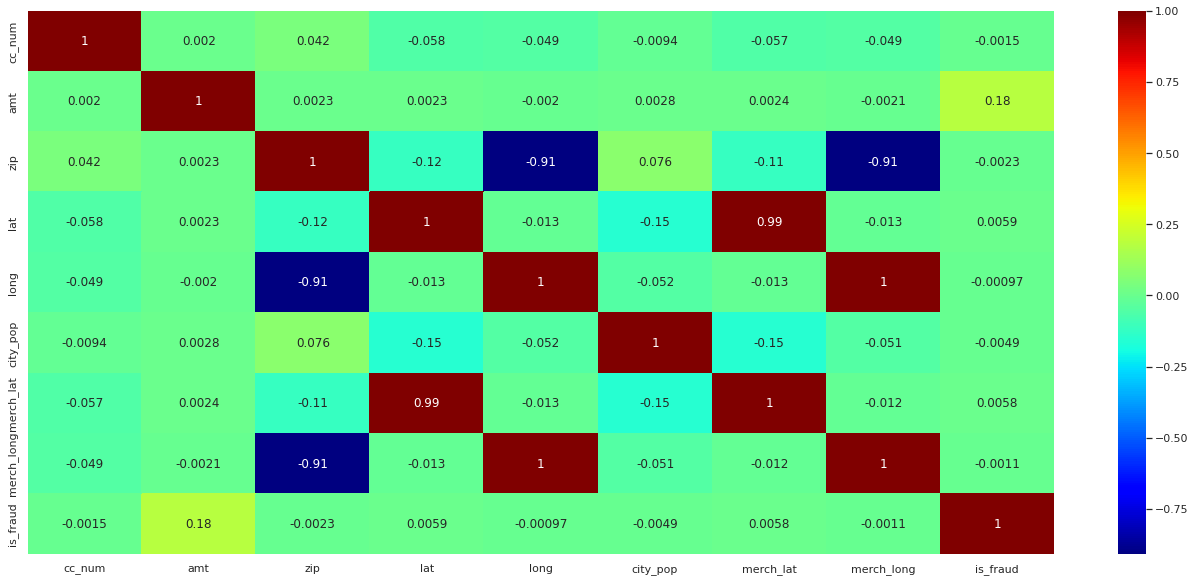

In [ ]:
plt.figure(figsize=(23,10))
sns.heatmap(df1.corr(), cmap='jet',annot=True)

Podemos observar una correlacion positiva entre la variable target y la variable amt pero esta es baja. Asimismo existe una correlación lineal alta entre las variables zip y merch_long y entre lat y merch_lat

Ahora, analizaremos la composicion de fraudes en este conjunto. 

In [ ]:
fraudes = df1.groupby('is_fraud').is_fraud.count().to_frame('Cant_Trx').reset_index().rename(columns={'index':'is_fraud'})
total_trx = fraudes['Cant_Trx'].sum()
porcentaje = []

for i in range(fraudes.shape[0]):
    pct = (fraudes.Cant_Trx[i] / total_trx) * 100
    porcentaje.append(round(pct, 2))
 
# display percentage
print('Total de Trx analizadas: %s'  % total_trx )
 
# display data
fraudes['Porcentaje'] = porcentaje
display(fraudes)

Total de Trx analizadas: 555719


,is_fraud,Cant_Trx,Porcentaje
0,0,553574,99.61
1,1,2145,0.39


In [ ]:
desc_fraud = ['Not Fraud', 'Fraud'] 
posicion = 1
fraudes.insert(loc=posicion, column='Desc_Fraud' , value=desc_fraud)
explode = (0, 0.1)

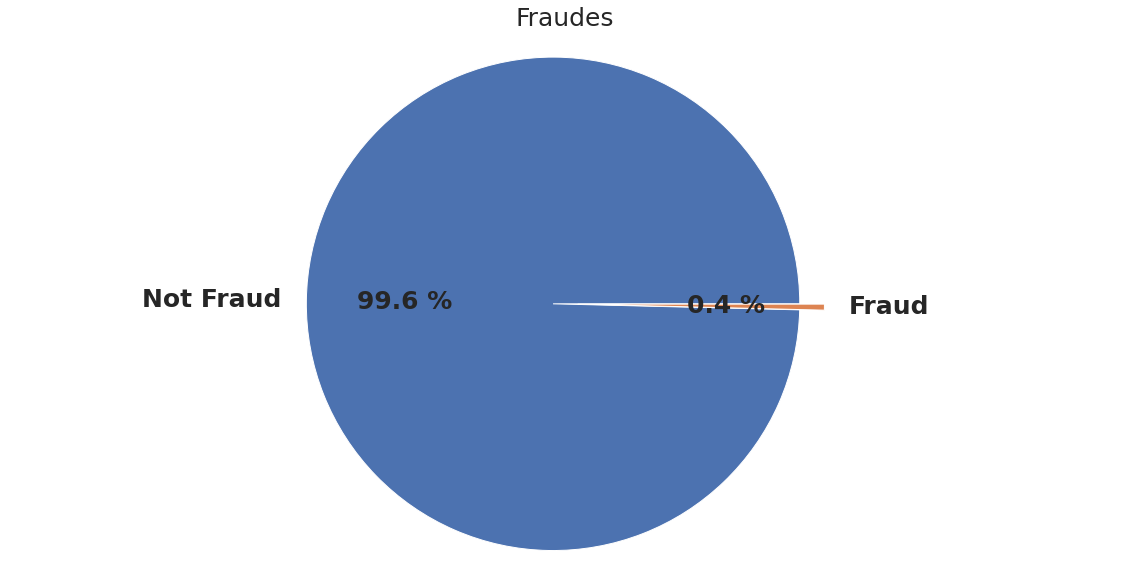

In [ ]:
plt.figure(figsize=(20,10))
plt.pie(fraudes['Porcentaje'], labels=fraudes['Desc_Fraud'] , autopct="%0.1f %%" , textprops={'fontsize': 25, 'weight':'bold'} ,explode = explode  )
plt.axis("equal")
plt.title("Fraudes" ,fontsize=25)
plt.show()

Para generar insights de cada variable, deberemos iniciar por separar aquellos casos que efectivamente fueron fraude, de aquellos que no lo fueron(not fraud). Para eso, generamos un dataset nuevo a continuación 


In [ ]:
is_fraud = df1.loc[:, 'is_fraud'] == 1
df_fraud = df1.loc[is_fraud]
df_fraud.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,full_name
1685,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,...,-102.7413,23,Cytogeneticist,1969-09-15,16bf2e46c54369a8eab2214649506425,1970-01-01 00:00:01.371852399,32.575873,-102.604290,1,Brooke Smith
1767,2020-06-21 22:32:22,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,...,-90.3508,1306,Public relations officer,1958-09-10,ab4b379d2c0c9c667d46508d4e126d72,1970-01-01 00:00:01.371853942,42.461127,-91.147148,1,Douglas Willis
1781,2020-06-21 22:37:27,6564459919350820,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,...,-90.3508,1306,Public relations officer,1958-09-10,47a9987ae81d99f7832a54b29a77bf4b,1970-01-01 00:00:01.371854247,42.771834,-90.158365,1,Douglas Willis
1784,2020-06-21 22:38:55,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,Denham Springs,...,-90.9027,71335,Herbalist,1994-05-31,fe956c7e4a253c437c18918bf96f7b62,1970-01-01 00:00:01.371854335,31.204974,-90.261595,1,William Perry
1857,2020-06-21 23:02:16,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,...,-102.7413,23,Cytogeneticist,1969-09-15,f6838c01f5d2262006e6b71d33ba7c6d,1970-01-01 00:00:01.371855736,31.315782,-102.736390,1,Brooke Smith


In [ ]:
a = df_fraud["amt"].sum()
b = df1["amt"].sum()
(a*100)/b

2.9388987565775624

## ANALISIS UNIVARIADO

Para el analisis univariado, analizaremos las columnas relevantes(aquellas que en principio no funcionen como primary o secondary key) graficando su distribución. Tambien aplicaremos tecnicas de data wrangling en los casos de fechas para hacer posible una mejor visualización

a. trans_date_trans_time

In [ ]:
df_fraud['datetime'] = pd.to_datetime(df_fraud['trans_date_trans_time'] )

In [ ]:
df_fraud['t_Year'] = df_fraud['datetime'].dt.year  #Generamos una division en la variable para tener una mejor comprensión
df_fraud['t_Month'] = df_fraud['datetime'].dt.month
df_fraud['t_Day'] = df_fraud['datetime'].dt.day
df_fraud['t_Hour'] = df_fraud['datetime'].dt.hour
df_fraud['t_date'] = df_fraud['datetime'].dt.date
df_fraud.drop(columns= ['trans_date_trans_time','datetime' ], inplace=True) 

In [ ]:
grouped_t_year =  df_fraud.groupby('t_Year').category.count().to_frame('Cant').reset_index().rename(columns={'index':'year'})
grouped_t_year = grouped_t_year.sort_values(by='Cant', ascending=True)
grouped_t_Month =  df_fraud.groupby('t_Month').category.count().to_frame('Cant').reset_index().rename(columns={'index':'month'})
grouped_t_Day =  df_fraud.groupby('t_Day').category.count().to_frame('Cant').reset_index().rename(columns={'index':'day'})
grouped_t_Hour =  df_fraud.groupby('t_Hour').category.count().to_frame('Cant').reset_index().rename(columns={'index':'hour'})

Text(0.5, 1.0, 'Año')

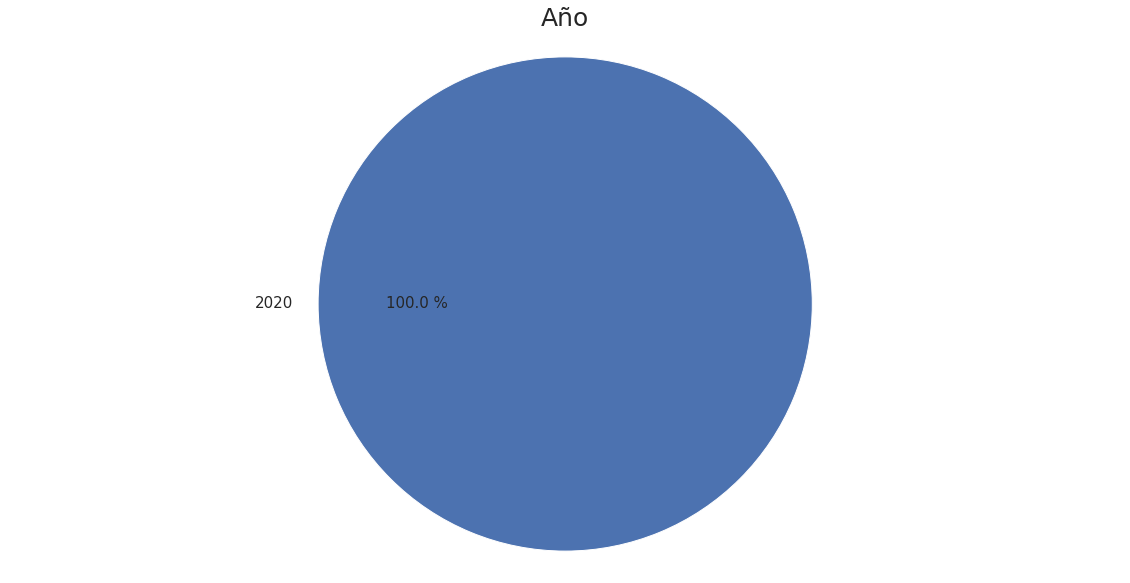

In [ ]:
plt.figure(figsize=(20,10))
plt.pie(grouped_t_year['Cant'], labels=grouped_t_year['t_Year'] , autopct="%0.1f %%" , textprops={'fontsize': 15} )
plt.axis("equal")
plt.title("Año" ,fontsize=25)

Todos nuestros datos corresponden a operaciones realizadas en el año 2020.

Analicemos el fraude mensual en mayor profundidad

Text(0.5, 1.0, 'Evolución del volumen de transacciones fraudulenas')

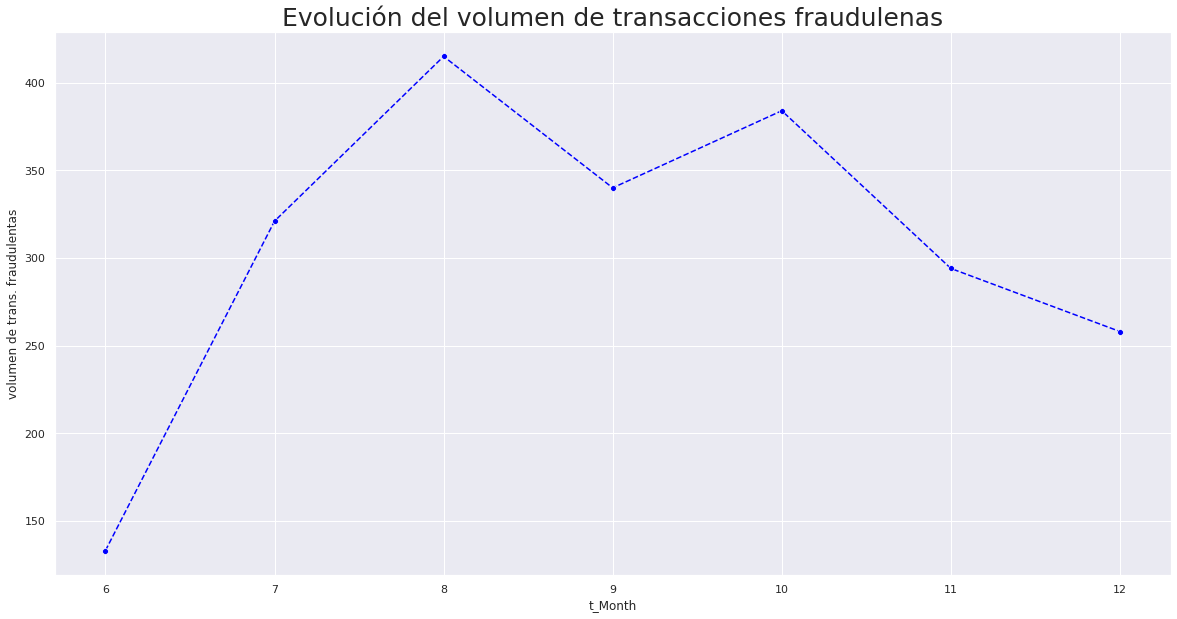

In [ ]:
fraude_mensual = df_fraud.groupby('t_Month').is_fraud.count().to_frame('volumen de trans. fraudulentas').reset_index()
plt.figure(figsize=(20,10))
sns.lineplot(y='volumen de trans. fraudulentas', x='t_Month', data=fraude_mensual, marker='o', linestyle='--', color='blue' )
plt.title("Evolución del volumen de transacciones fraudulenas" ,fontsize=25)

Las transacciones tuvieron lugar entre los meses de junio y diciembre del 2020. El pico mas alto fue en agosto.

Text(0.5, 1.0, 'Cantidad de fraudes en dias del mes')

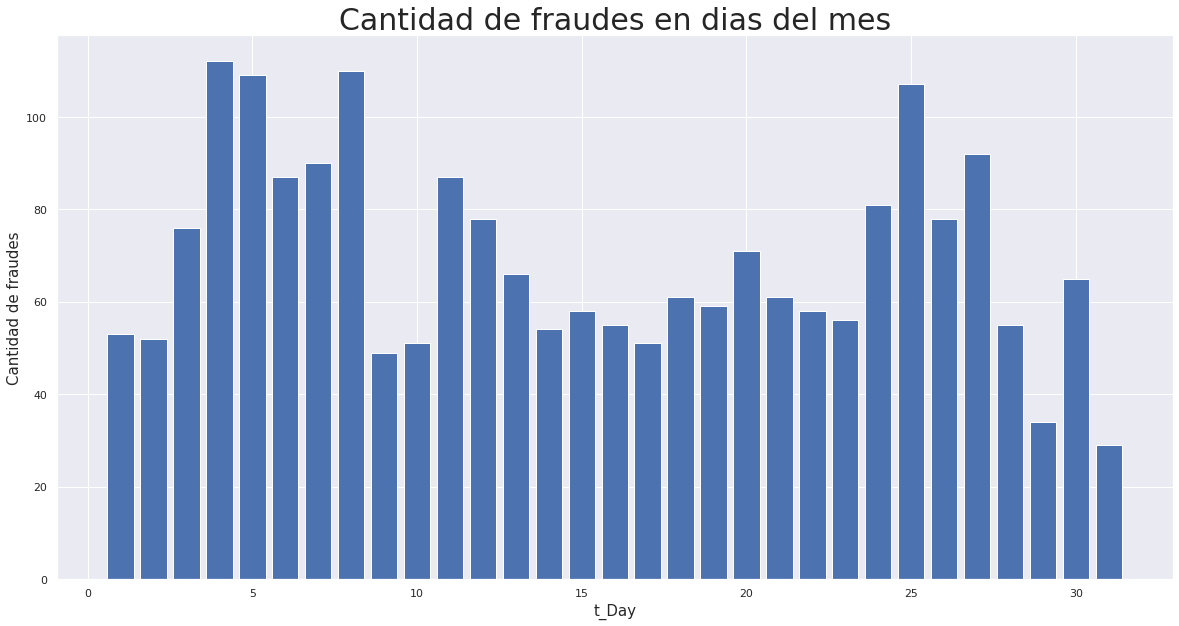

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(grouped_t_Day['t_Day'], grouped_t_Day['Cant'])
sns.set(style="darkgrid")
plt.xlabel('t_Day' , fontsize = 15)
plt.ylabel('Cantidad de fraudes', fontsize = 15 )
plt.show
plt.xticks(rotation = 0)
plt.title('Cantidad de fraudes en dias del mes' , fontsize = 30 )

Text(0.5, 1.0, 'hora')

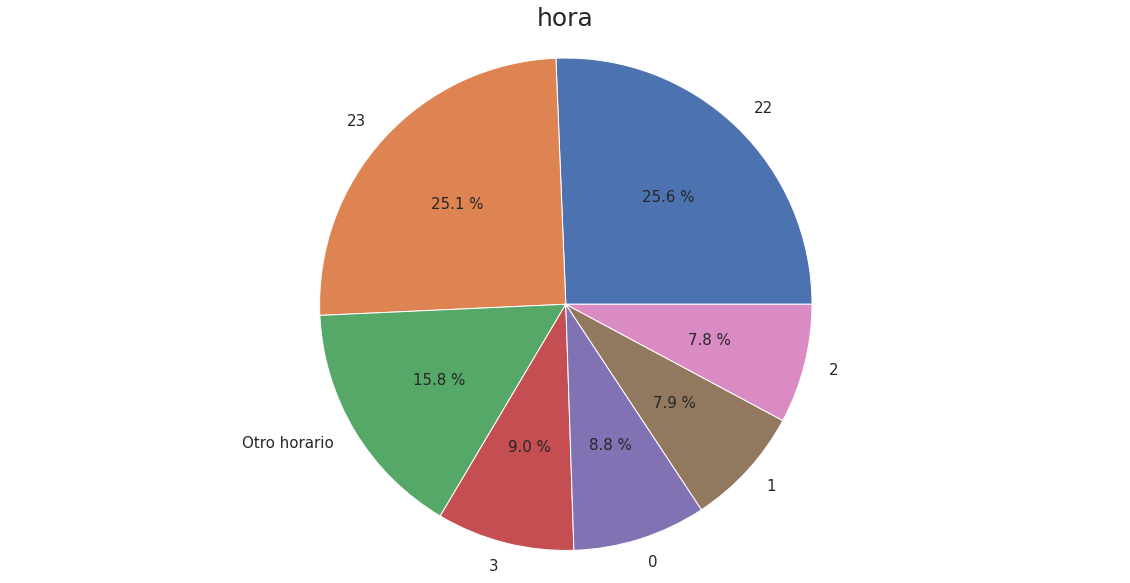

In [ ]:
horarios_pico = df_fraud.t_Hour.value_counts().head(6).index

df_horarios_pico_aux = df_fraud[['t_Hour']] .replace({x:'Otro horario' for x in df_fraud.t_Hour.unique() if x not in horarios_pico})



df_horarios_pico = df_horarios_pico_aux.t_Hour.value_counts().to_frame('Cant').reset_index()



plt.figure(figsize=(20,10))

plt.pie(df_horarios_pico['Cant'], labels=df_horarios_pico['index'] , autopct="%0.1f %%" , textprops={'fontsize': 15} )

plt.axis("equal")

plt.title("hora" ,fontsize=25)

El dato mas llamativo que surge de este analisis, es que el 50% de las transacciones fraudulentas, han tenido lugar entre las 22 y las 23 horas. 

b. merchant

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
grouped_merchant =  df_fraud.groupby('merchant').category.count().to_frame('Cant').reset_index().rename(columns={'index':'year'})
grouped_merchant = grouped_merchant.sort_values(by='Cant', ascending=True).head(10)


In [ ]:
grouped_merchant

,merchant,Cant
0,fraud_Abbott-Rogahn,1
388,"fraud_Parker, Nolan and Trantow",1
140,fraud_Ernser-Feest,1
141,fraud_Ernser-Lynch,1
383,fraud_Pacocha-Weissnat,1
143,fraud_Fadel-Hilpert,1
144,fraud_Fahey Inc,1
145,"fraud_Feil, Hilpert and Koss",1
146,fraud_Feil-Morar,1
373,fraud_O'Hara-Wilderman,1


En todos los casos de fraude, la categoria merchant corresponde a personas diferentes

c. category

In [ ]:
grouped_category =  df_fraud.groupby('category').category.count().to_frame('Cant').reset_index().rename(columns={'index':'year'})
grouped_category = grouped_category.sort_values(by='Cant', ascending=False)

Text(0.5, 1.0, 'Categorias de compra mas afectadas')

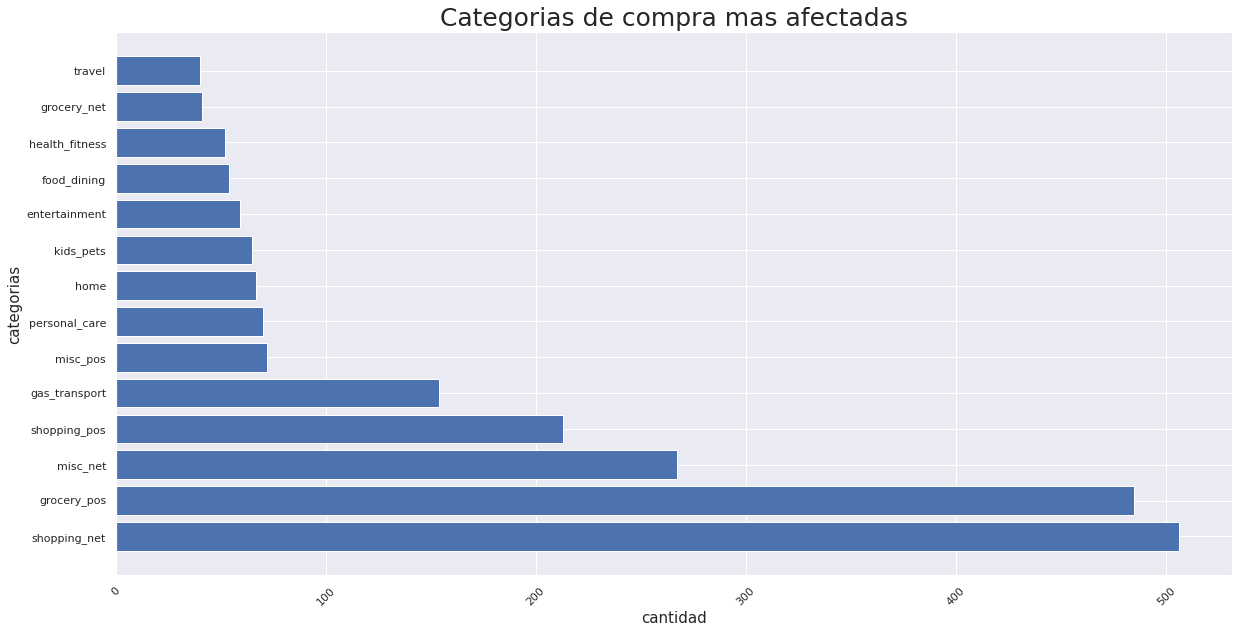

In [ ]:
plt.figure(figsize=(20,10))
plt.barh(grouped_category['category'], grouped_category['Cant'])
plt.xlabel('cantidad', fontsize = 15)
plt.ylabel('categorias', fontsize = 15 )
plt.show
plt.xticks(rotation = 45)
plt.title('Categorias de compra mas afectadas', fontsize = 25)

d. amt

In [ ]:
grouped_amt =  df_fraud.groupby('amt').category.count().to_frame('Cant').reset_index().rename(columns={'index':'year'})
grouped_amt = grouped_amt.sort_values(by='Cant', ascending=True)

Text(0.5, 1.0, 'Distribución de AMT')

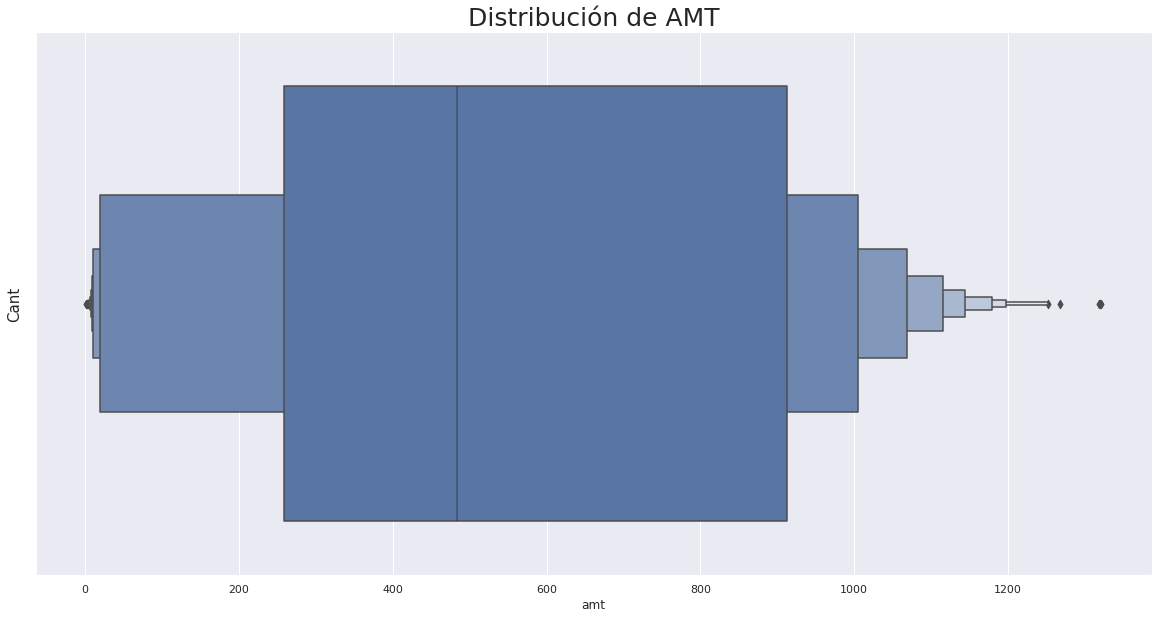

In [ ]:
plt.figure(figsize=(20,10))
sns.boxenplot(grouped_amt['amt'])
plt.ylabel('Cant', fontsize = 15 )
plt.title('Distribución de AMT', fontsize = 25)

e. first

In [ ]:
grouped_first =  df_fraud.groupby('first').category.count().to_frame('Cant').reset_index().rename(columns={'index':'year'})
grouped_first = grouped_first.sort_values(by='Cant', ascending=False).head(20)

Text(0.5, 1.0, 'First name')

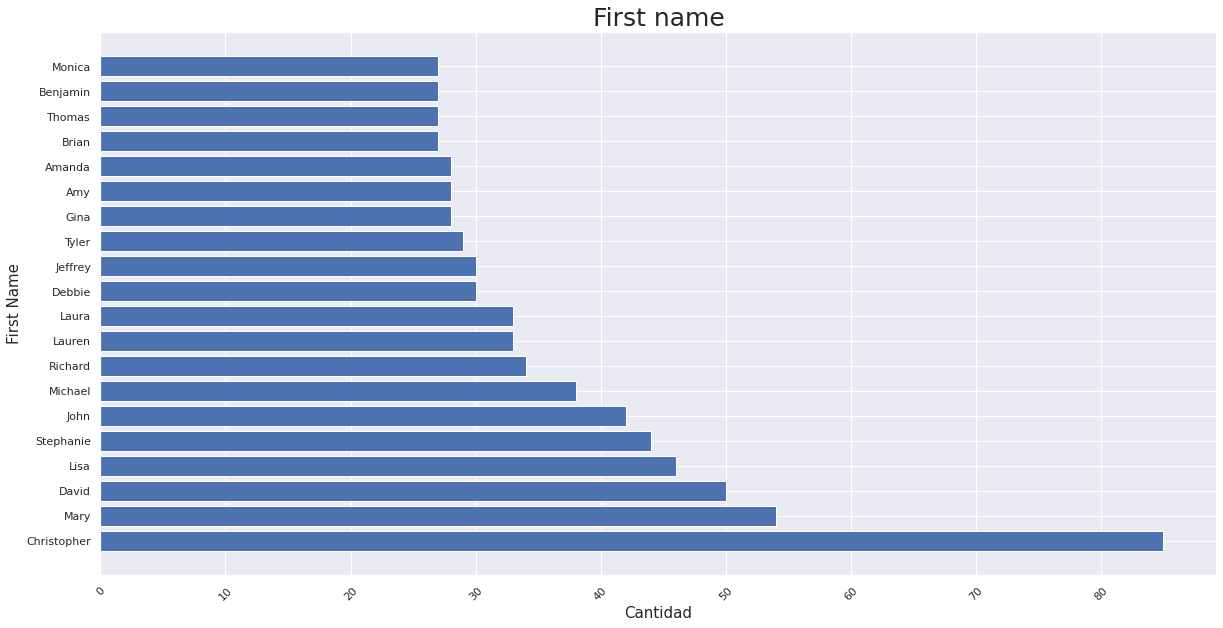

In [ ]:
plt.figure(figsize=(20,10))
plt.barh(grouped_first['first'], grouped_first['Cant'])
plt.xlabel('Cantidad', fontsize = 15)
plt.ylabel('First Name', fontsize = 15 )
plt.show
plt.xticks(rotation = 45)
plt.title('First name', fontsize = 25)

Aquí podemos observar que Christopher es el nombre mas comun en los fraudes

d. last

In [ ]:
grouped_last =  df_fraud.groupby('last').category.count().to_frame('Cant').reset_index().rename(columns={'index':'year'})
grouped_last = grouped_last.sort_values(by='Cant', ascending=False).head(20)

Text(0.5, 1.0, 'Last name')

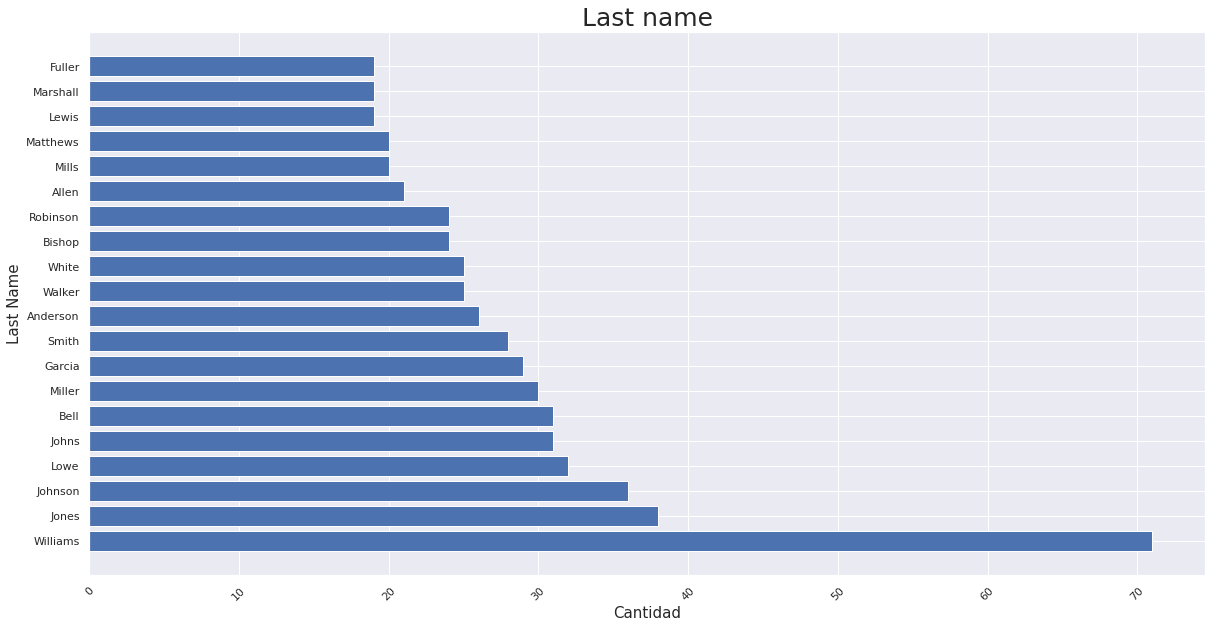

In [ ]:
plt.figure(figsize=(20,10))
plt.barh(grouped_last['last'], grouped_last['Cant'])
plt.xlabel('Cantidad', fontsize = 15)
plt.ylabel('Last Name', fontsize = 15 )
plt.show
plt.xticks(rotation = 45)
plt.title('Last name', fontsize = 25)

Podemos ver que Williams es el apellido mas comun. Para realizar un analisis mas completo, debemos averguar cual es el nombre y apellido mas comun.

e. full_name

In [ ]:
grouped_full =  df_fraud.groupby('full_name').category.count().to_frame('Cant').reset_index().rename(columns={'index':'year'})
grouped_full = grouped_full.sort_values(by='Cant', ascending=False).head(20)

Text(0.5, 1.0, 'Full name')

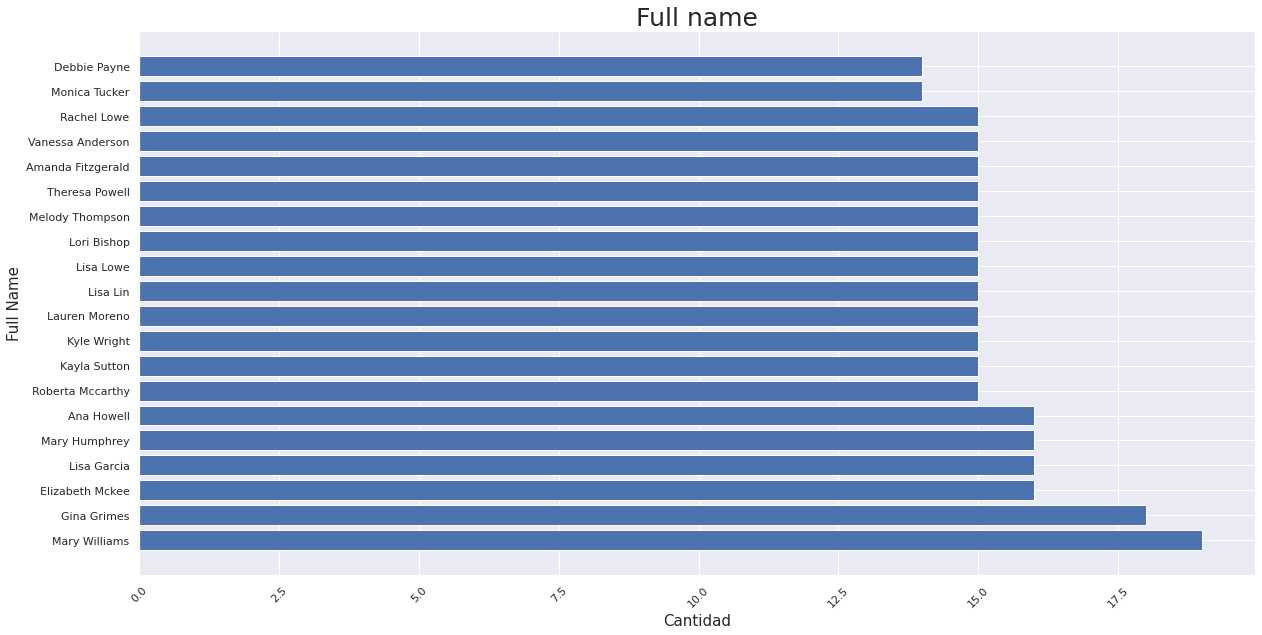

In [ ]:
plt.figure(figsize=(20,10))
plt.barh(grouped_full['full_name'], grouped_full['Cant'])
plt.xlabel('Cantidad', fontsize = 15)
plt.ylabel('Full Name', fontsize = 15 )
plt.show
plt.xticks(rotation = 45)
plt.title('Full name', fontsize = 25)

De esta forma, podemos ver que Mary Williams ha estado involucrada en 19 fraudes. Su nombre se corresponde con el apellido mas afectado y el segundo nombre mas afectado

f. gender

In [ ]:
fraudes_gender = df_fraud.groupby('gender').city.count().to_frame('Cant_trx_gender').reset_index().rename(columns={'index':'gender'})
total_trx_gender = fraudes_gender['Cant_trx_gender'].sum()
porcentaje_gender = []

for i in range(fraudes_gender.shape[0]):
    pct = (fraudes_gender.Cant_trx_gender[i] / total_trx_gender) * 100
    porcentaje_gender.append(round(pct, 2))
 
# display percentage
print('Total de personas por sexo analizadas: %s'  % total_trx_gender )
 
# display data
fraudes_gender['Porcentaje'] = porcentaje_gender
fraudes_gender =  fraudes_gender.sort_values(by='Porcentaje', ascending=False)
fraudes_gender = fraudes_gender.head(10)
display(fraudes_gender)

Total de personas por sexo analizadas: 2145


,gender,Cant_trx_gender,Porcentaje
0,F,1164,54.27
1,M,981,45.73


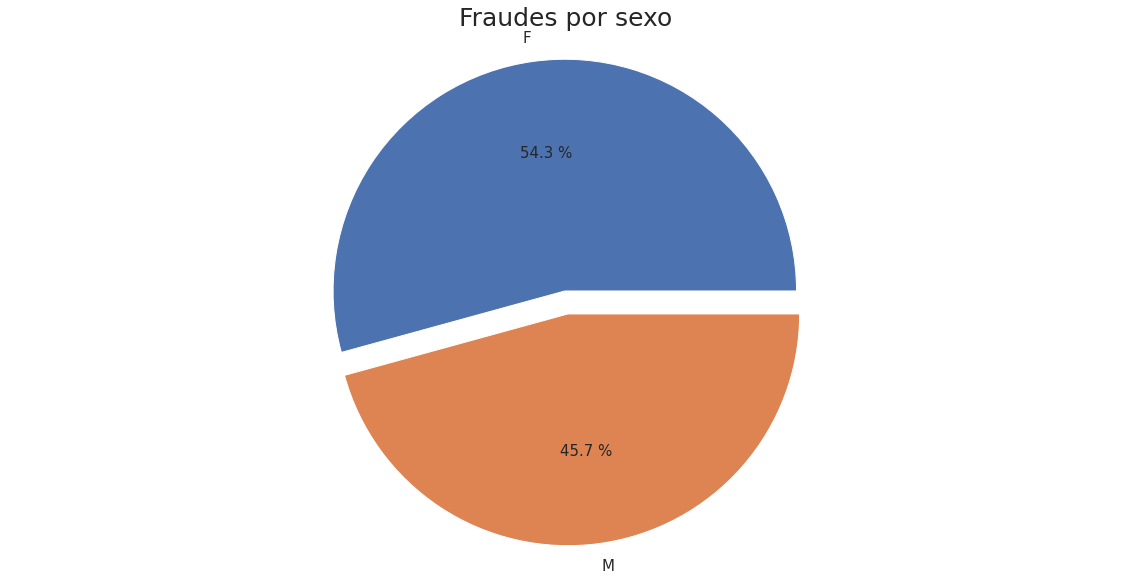

In [ ]:
plt.figure(figsize=(20,10))
plt.pie(fraudes_gender['Porcentaje'], labels=fraudes_gender['gender'] , autopct="%0.1f %%" , textprops={'fontsize': 15} ,explode = explode  )
plt.axis("equal")
plt.title("Fraudes por sexo" ,fontsize=25)
plt.show()

g. street

In [ ]:
grouped_street =  df_fraud.groupby('street').category.count().to_frame('Cant').reset_index().rename(columns={'index':'year'})
grouped_street = grouped_street.sort_values(by='Cant', ascending=False).head(20)

In [ ]:
import plotly.graph_objects as go 

In [ ]:
data=[go.Table(header=dict(values=['Street', 'Cantidad'], align='left', fill=dict(color='orange'), font=dict(color='black',size=16), height=50, line=dict(color='black', width=4)) ,
                 cells=dict(values=[grouped_street['street'], grouped_street['Cant']], align='left', fill=dict(color='lightcyan'), font=dict(color='black',size=14), height=30, line=dict(color='black', width=4)))]

fig = go.Figure(data)
fig.show()

Las cantidades de las calles resultan identicas a las cantidades de los nombres completos. Observaremos en el analisis bivariado la coincidencia entre ambas variables.

h. city

In [ ]:
my_city =df_fraud.groupby('city').city.count().to_frame('conteos').reset_index().rename(columns={'index':'cities'})
my_city = my_city.sort_values(by='conteos', ascending=False).head(20)

Text(0.5, 1.0, 'Ciudades mas afectadas')

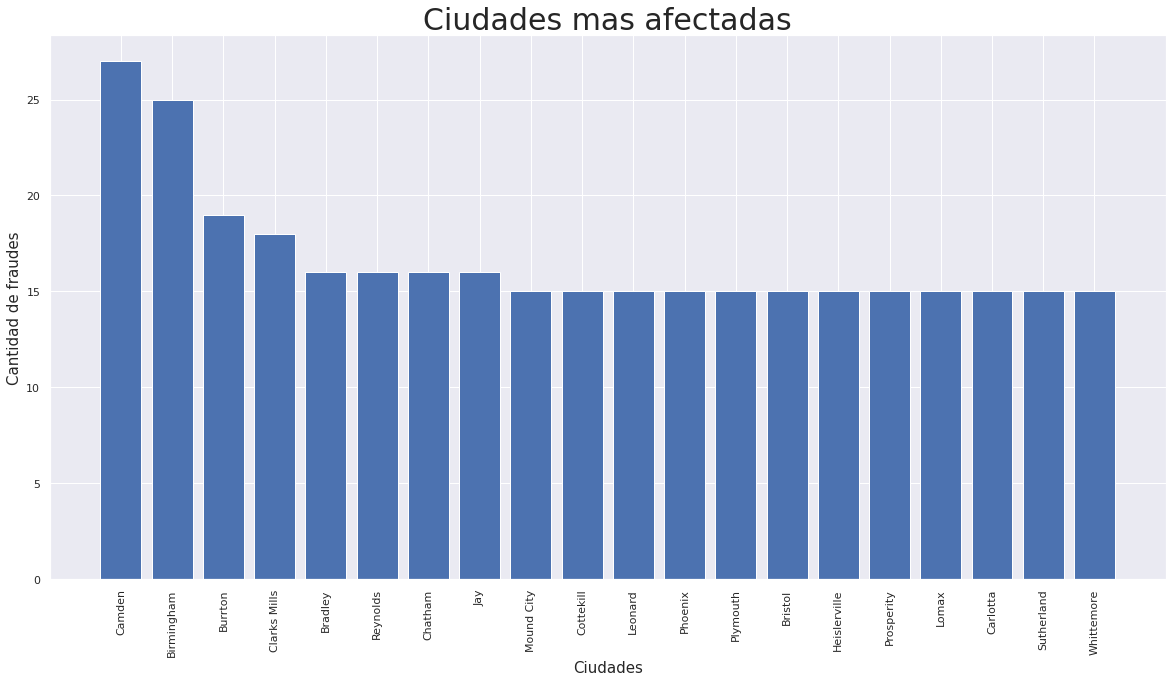

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(my_city['city'], my_city['conteos'])
sns.set(style="darkgrid")
plt.xlabel('Ciudades' , fontsize = 15)
plt.ylabel('Cantidad de fraudes', fontsize = 15 )
plt.show
plt.xticks(rotation = 90)
plt.title('Ciudades mas afectadas' , fontsize = 30 )

Camden pertenece al estado de Nueva Yersey lo cual hace comprensible su correlato. Deberemos ver como se comporta la grafica respecto al promedio de amt


In [ ]:
grouped_si = df1[df1.is_fraud == 1].city.value_counts().to_frame("conteos").reset_index()

grouped_no = df1[df1.is_fraud == 0].city.value_counts().to_frame("conteos").reset_index()


In [ ]:
grouped_ok= pd.merge(grouped_si,grouped_no, on="index")

In [ ]:
grouped_ok["portecentaje"] =  (grouped_ok["conteos_x"] * 100) / (grouped_ok["conteos_x"]+grouped_ok["conteos_y"])#porcentaje de afectacion real

In [ ]:
grouped_ok = grouped_ok.sort_values(by='portecentaje', ascending=False).head(20)

In [ ]:
import plotly.express as px
df = grouped_ok
fig = px.bar(df, x="index", y="portecentaje", width=1200, height=600)
fig.update_layout(title_text='Porcentaje de afectación real del fraude en las transacciones de la ciudad', title_x=0.5 , title_font_size= 25 )
fig.show() 


i. state

In [ ]:
my_state = df_fraud.groupby('state').state.count().to_frame('conteos').reset_index().rename(columns={'index':'states'})
my_state = my_state.sort_values(by='conteos', ascending=False).head(20)

Text(0.5, 1.0, 'Estados mas afectados')

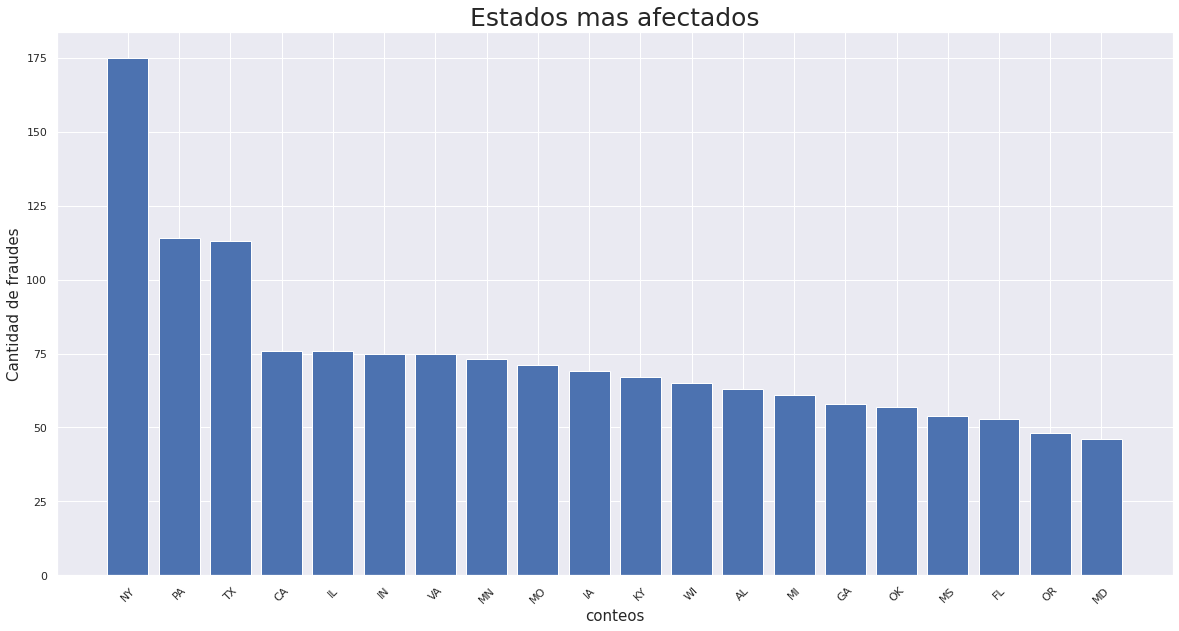

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(my_state['state'], my_state['conteos'])
plt.xlabel('conteos', fontsize = 15)
plt.ylabel('Cantidad de fraudes', fontsize = 15 )
plt.show
plt.xticks(rotation = 45)
plt.title('Estados mas afectados', fontsize = 25)

El estado de nueva york fue el mas afectado. Debemos analizar el promedio de las afectaciones para conocer mejor como fueron las afectaciones y que la poblacion no genere una concentracion exagerada de fraudes

j. lat y long

In [ ]:
pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium  #needed for interactive map
from folium.plugins import HeatMap

k. city_pop

In [ ]:
import plotly.express as px

fig = px.violin(df_fraud, y="city_pop", box=True, points="all")
fig.show()

La media poblacional se encuentra bastante baja aunue podemos advertir la existencia de varios puntos que se acercan a 1.6 M

l. job

In [ ]:
my_job = df_fraud.groupby('job').job.count().to_frame('cant').reset_index().rename(columns={'index':'states'})
my_job = my_job.sort_values(by='cant', ascending=False).head(20)

Text(0.5, 1.0, 'Profesiones mas afectadas')

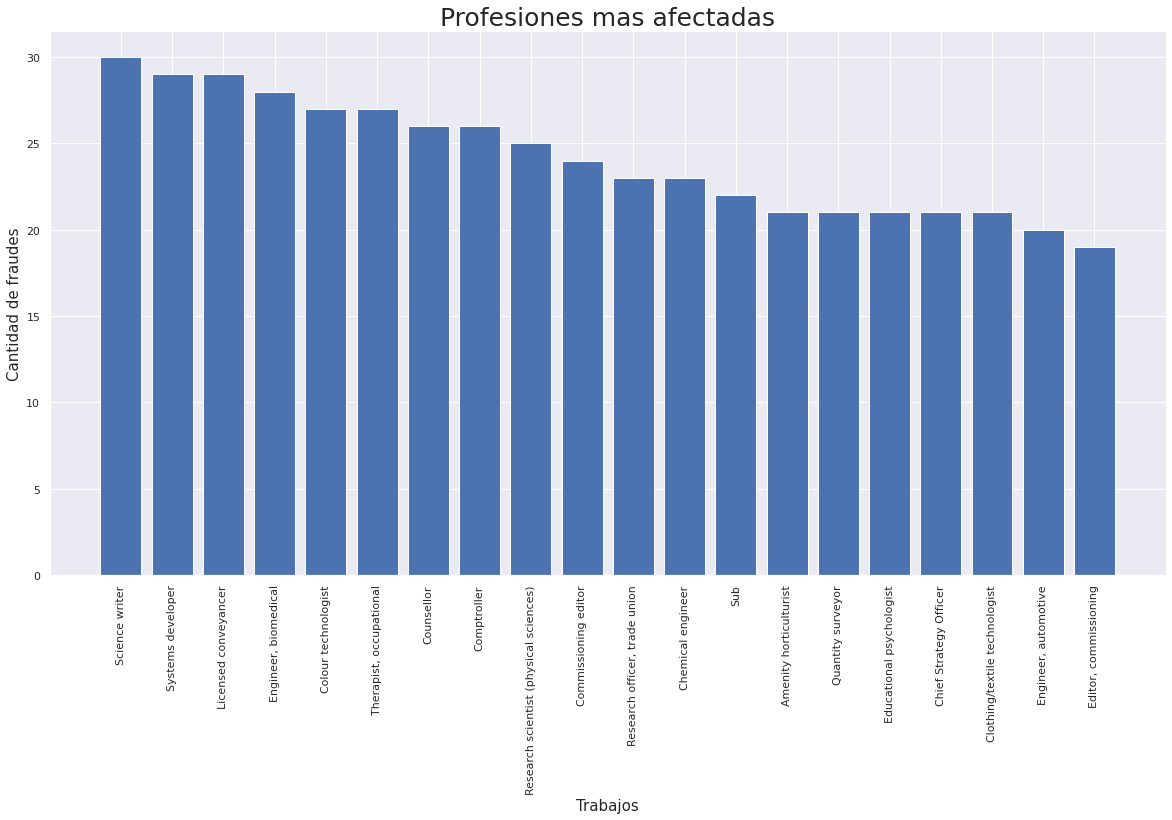

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(my_job['job'], my_job['cant'])
plt.xlabel('Trabajos', fontsize = 15)
plt.ylabel('Cantidad de fraudes', fontsize = 15 )
plt.show
plt.xticks(rotation = 90)
plt.title('Profesiones mas afectadas', fontsize = 25)

La profesion mas afecetada fue Science writer pero no resulta suficiente para concluir una tendencia clara. Deberemos observar si surge un dato mas concreto al analizar los importes involucrados.

j. dob

In [ ]:
from datetime import date

In [ ]:
df1['dob'] = pd.to_datetime(df1['dob'])
ahora = date.today()
df1['Edad'] = ahora.year - df1['dob'].dt.year


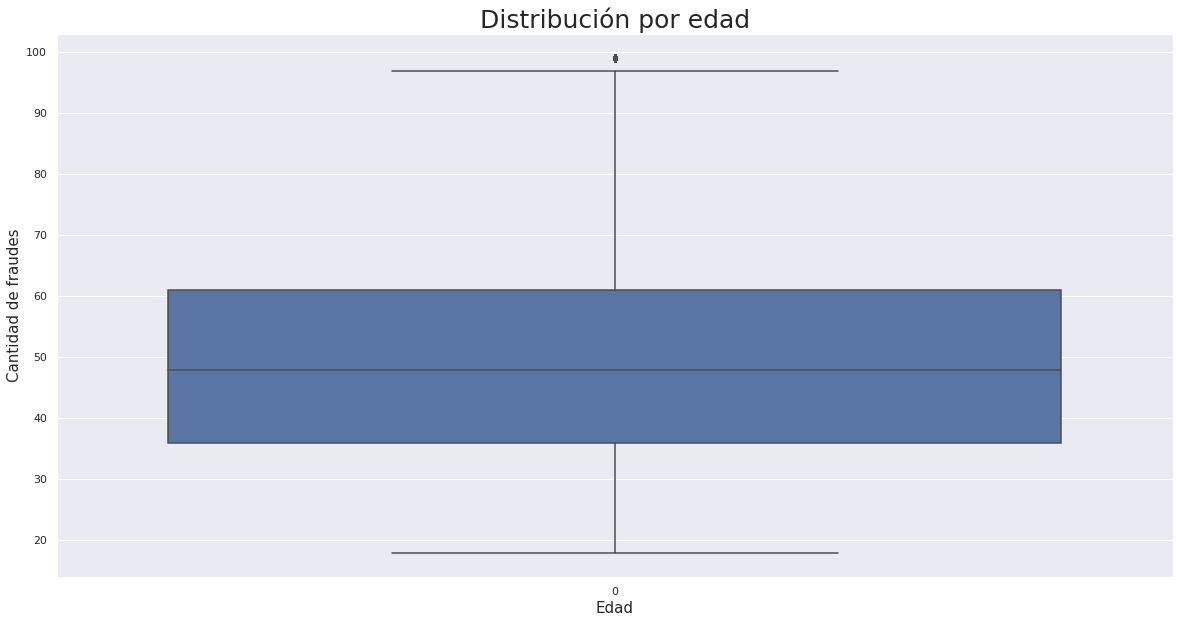

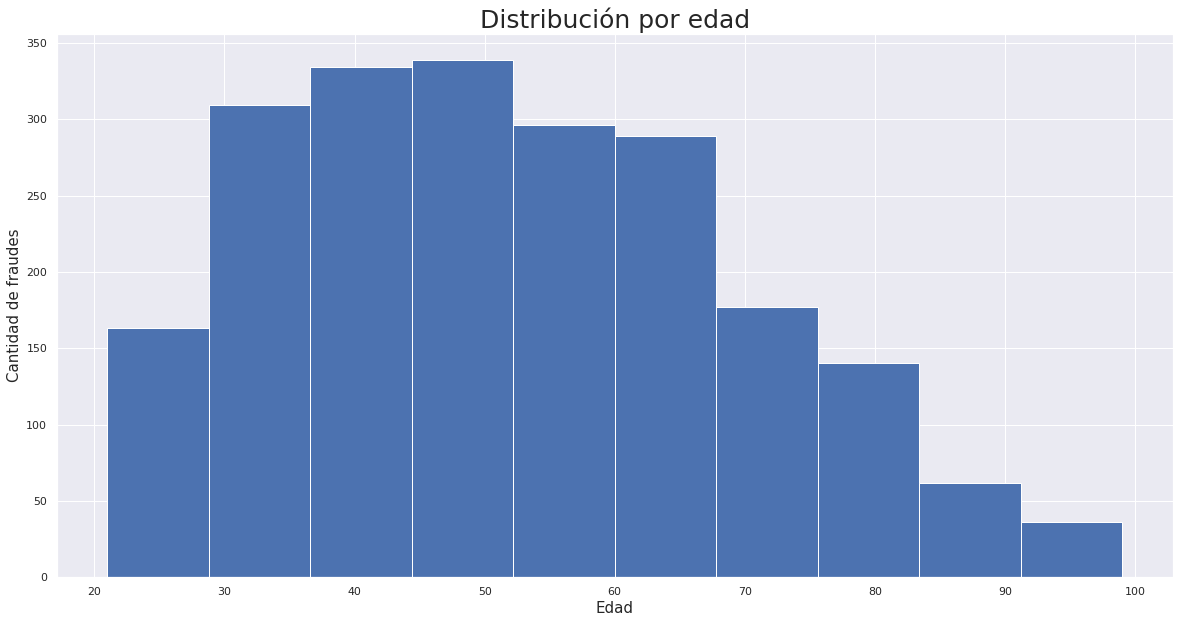

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df1['Edad'] )
plt.xlabel('Edad', fontsize = 15 )
plt.ylabel('Cantidad de fraudes', fontsize = 15 )
plt.title('Distribución por edad', fontsize = 25 )

mask = df1['is_fraud'] == 1 
plt.figure(figsize=(20,10))
plt.xlabel('Edad', fontsize = 15 )
plt.ylabel('Cantidad de fraudes', fontsize = 15 )
plt.title('Distribución por edad', fontsize = 25 )
df1[mask]["Edad"].hist()
plt.show() 

Podemos ver que la media de edad esta en los 46 años. A partir de los 20, los fraudes crecen acelaradamente hasta los 50 años, tiempo en el cual la cantidad de casos comienzan a bajar.

k. unix_time

In [ ]:
df_fraud['unix'] = pd.to_datetime(df_fraud['unix_time'] )

In [ ]:
df_fraud['u_Year'] = df_fraud['unix'].dt.year
df_fraud['u_Month'] = df_fraud['unix'].dt.month
df_fraud['u_Day'] = df_fraud['unix'].dt.day
df_fraud['u_Hour'] = df_fraud['unix'].dt.hour
df_fraud['u_date'] = df_fraud['unix'].dt.date
df_fraud.drop(columns= ['unix_time','unix' ], inplace=True) 

In [ ]:
grouped_u_year =  df_fraud.groupby('u_Year').category.count().to_frame('Cant').reset_index().rename(columns={'index':'year'})
grouped_u_year = grouped_u_year.sort_values(by='Cant', ascending=True)
grouped_u_Month =  df_fraud.groupby('u_Month').category.count().to_frame('Cant').reset_index().rename(columns={'index':'year'})
grouped_u_Day =  df_fraud.groupby('u_Day').category.count().to_frame('Cant').reset_index().rename(columns={'index':'year'})
grouped_u_Hour =  df_fraud.groupby('u_Hour').category.count().to_frame('Cant').reset_index().rename(columns={'index':'year'})

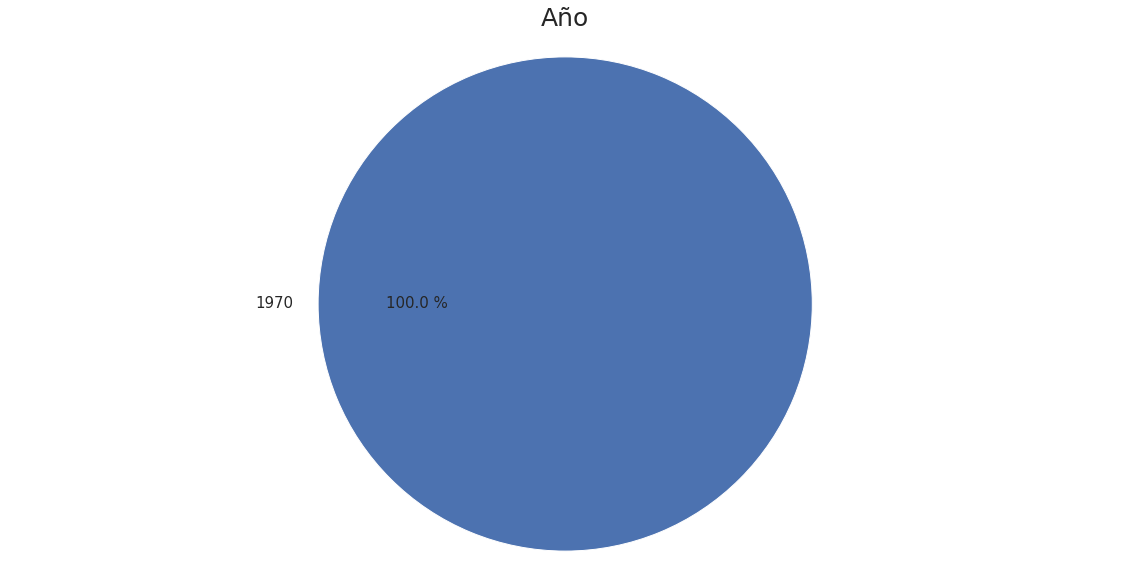

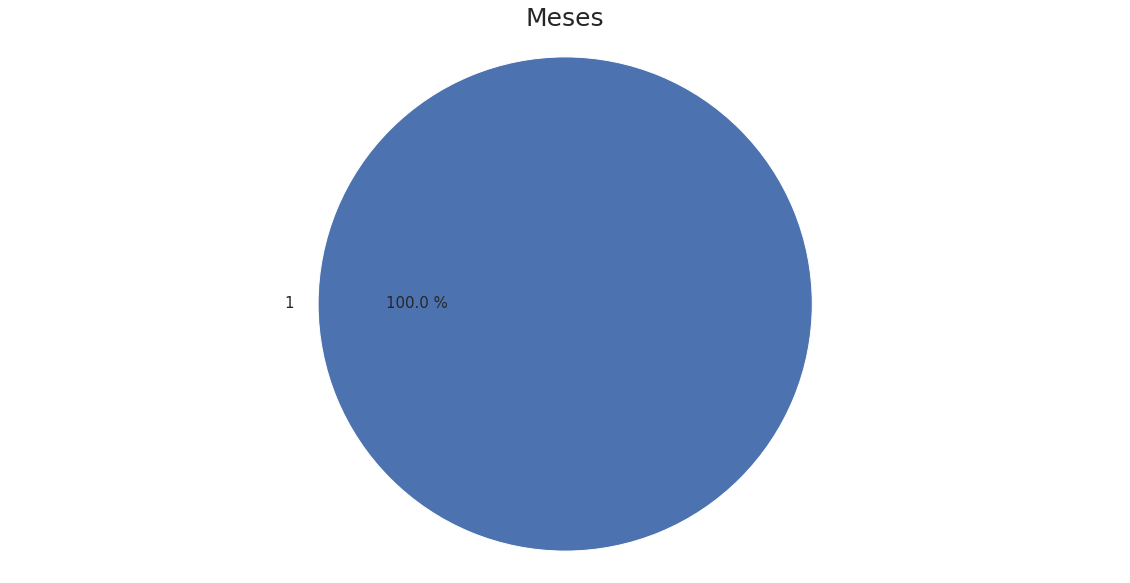

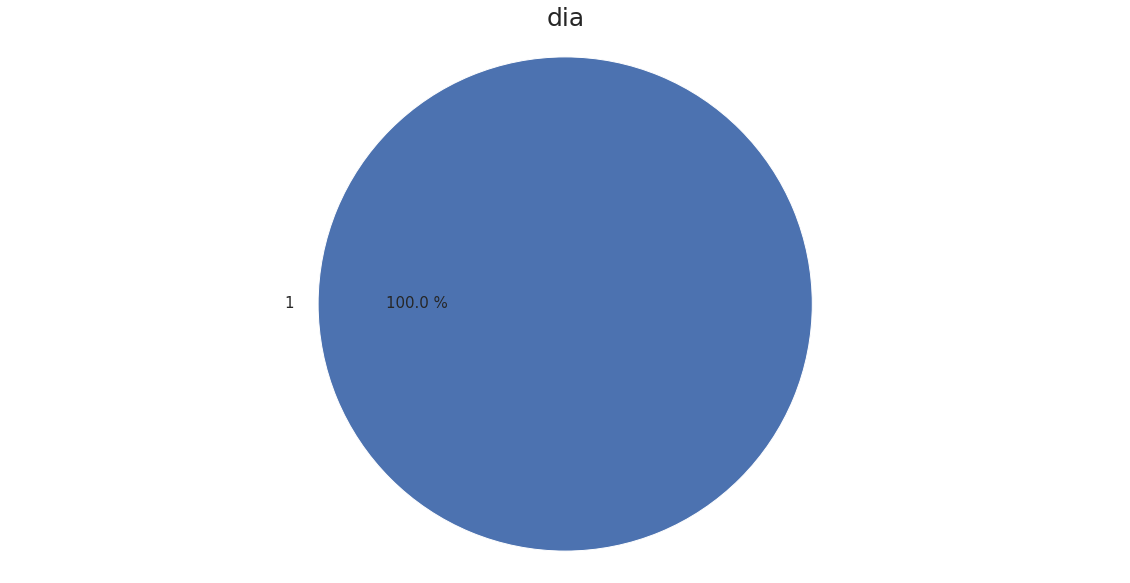

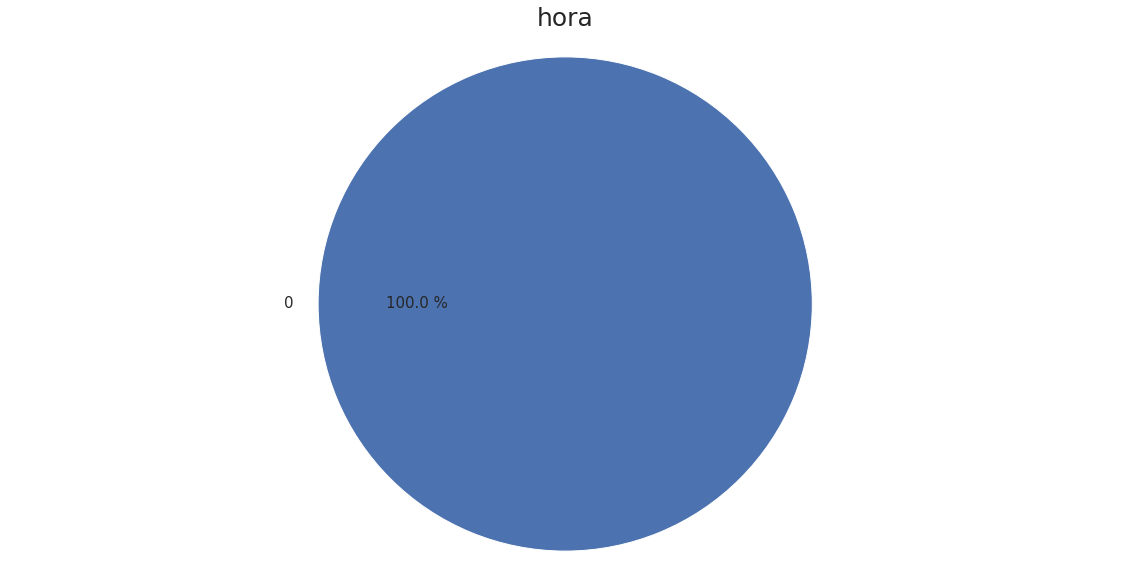

In [ ]:
plt.figure(figsize=(20,10))
plt.pie(grouped_u_year['Cant'], labels=grouped_u_year['u_Year'] , autopct="%0.1f %%" , textprops={'fontsize': 15} )
plt.axis("equal")
plt.title("Año" ,fontsize=25)

plt.figure(figsize=(20,10))
plt.pie(grouped_u_Month['Cant'], labels=grouped_u_Month['u_Month'] , autopct="%0.1f %%" , textprops={'fontsize': 15} )
plt.axis("equal")
plt.title("Meses" ,fontsize=25)

plt.figure(figsize=(20,10))
plt.pie(grouped_u_Day['Cant'], labels=grouped_u_Day['u_Day'] , autopct="%0.1f %%" , textprops={'fontsize': 15} )
plt.axis("equal")
plt.title("dia" ,fontsize=25)

plt.figure(figsize=(20,10))
plt.pie(grouped_u_Hour['Cant'], labels=grouped_u_Hour['u_Hour'] , autopct="%0.1f %%" , textprops={'fontsize': 15} )
plt.axis("equal")
plt.title("hora" ,fontsize=25)



plt.show()

En el presente caso, advertimos que todos los datos de unix time son iguales por lo que corresponde su eliminacion ya que ya tenemos la fecha y hora de las interacciones. En consecuencia, realizamos un drop.

In [ ]:
df1.drop(['unix_time'], axis=1)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,full_name,Edad
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,33.986391,-81.200714,0,Jeff Elliott,55
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,39.450498,-109.960431,0,Joanne Williams,33
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,40.495810,-74.196111,0,Ashley Lopez,53
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,28.812398,-80.883061,0,Brian Williams,36
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,44.959148,-85.884734,0,Nathan Massey,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0,Michael Olson,57
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,29.661049,-96.186633,0,Jose Vasquez,24
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0,Ann Lawson,42
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,44.470525,-117.080888,0,Eric Preston,58


##ANALISIS BIVARIADO

In [ ]:
df_fraud.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'merch_lat', 'merch_long', 'is_fraud', 'full_name',
       't_Year', 't_Month', 't_Day', 't_Hour', 't_date', 'u_Year', 'u_Month',
       'u_Day', 'u_Hour', 'u_date'],
      dtype='object')

Comencemos con los años de nacimiento de los afectados el monto de fraude. De esta forma, podremos entender cuales son los rangos etareos cuantitativamente mas afectados. De esta forma, puede que haya edades que hayan sufrido numerosos fraudes pero su deteccion fue temprana y esto no genero un gran perjuicio en sus economias. Por el contrario, puede que haya edades que tuvieron pocos casos, pero estos fueron devastadores para sus finanzas.

In [ ]:
df_fraud['dob'] = pd.to_datetime(df_fraud['dob'])
ahora = date.today()
df_fraud['Edad'] = ahora.year - df_fraud['dob'].dt.year

Para nuestro analisis bivariado, vamos a realizar agrupaciones que nos permitan entender como interactuan las variables. Asimismo, utilizaremos distintas operaciones arigmeticas(sum,mean,median) sobre el factor secundario(aquel que no determina la agrupacion inicial) para ir viendo como se comporta nuestra muestra.

Asimismo, utilizaremos los tres modulos de graficos vistos en clase(matplotlib, seaborn y plotly) para ver cual es el que se austa mejor a nuestras necesidades analiticas.

Comencemos con la edad de los afectados el monto de fraude. De esta forma, podremos entender cuales son los rangos etareos cuantitativamente mas afectados. De esta forma, puede que haya edades que hayan sufrido numerosos fraudes pero su deteccion fue temprana y esto no genero un gran perjuicio en sus economias. Por el contrario, puede que haya edades que tuvieron pocos casos, pero estos fueron devastadores para sus finanzas.

a. Promedio de amt por edad

In [ ]:
grouped_amt = df_fraud.groupby(['Edad'])['amt'].mean().reset_index()

In [ ]:
grouped_amt

,Edad,amt
0,21,666.145000
1,23,603.491905
2,24,472.480238
3,25,660.086316
4,26,679.346949
...,...,...
62,92,693.375714
63,94,618.512857
64,96,464.875714
65,97,711.996250


<function matplotlib.pyplot.show(*args, **kw)>

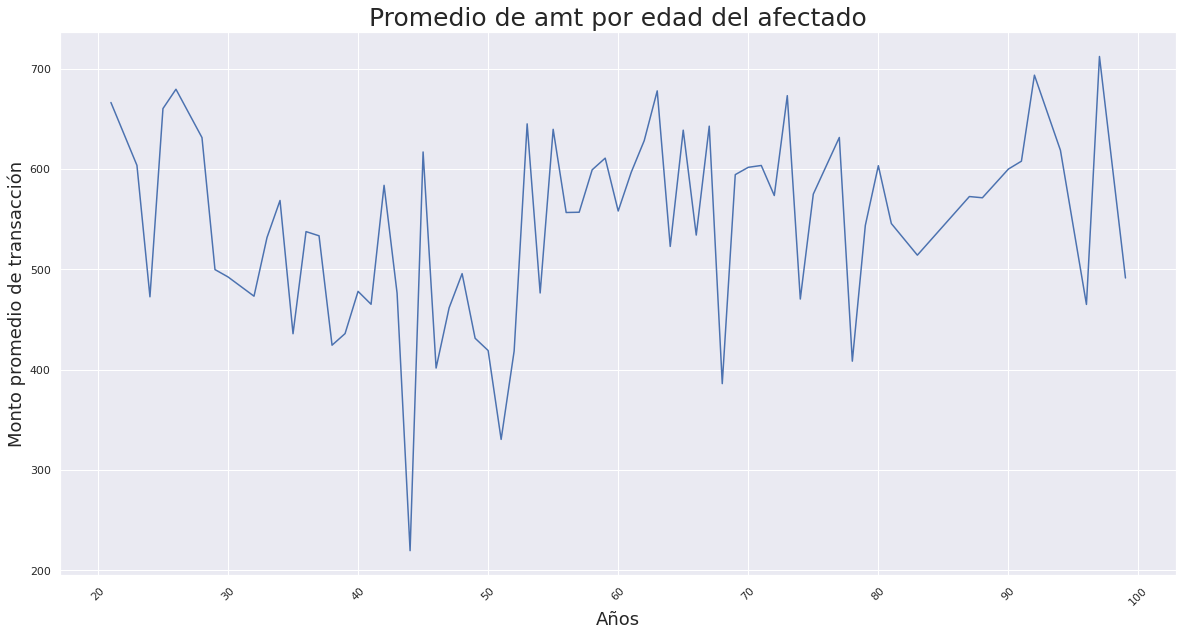

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(grouped_amt['Edad'], grouped_amt['amt'])
plt.title("Promedio de amt por edad del afectado" ,fontsize=25)
plt.xlabel('Años', fontsize = 18 )
plt.ylabel('Monto promedio de transacción', fontsize = 18 )
plt.show
plt.xticks(rotation = 45)
plt.show

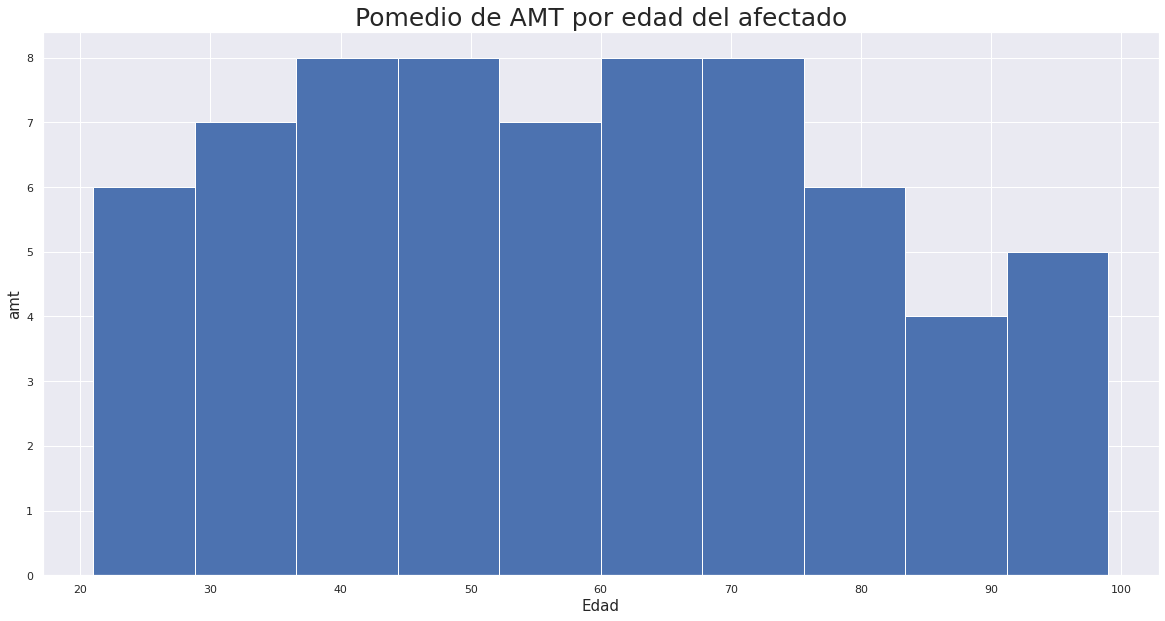

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel('Edad', fontsize = 15 )
plt.ylabel("amt", fontsize = 15 )
plt.title('Pomedio de AMT por edad del afectado', fontsize = 25 )
grouped_amt["Edad"].hist()
plt.show() 

In [ ]:
is_fem = df_fraud.loc[:,'gender'] == "F"
df_fem = df_fraud.loc[is_fem]

is_masc = df_fraud.loc[:, 'gender'] == "M"
df_masc = df_fraud.loc[is_masc]

In [ ]:
grouped_fem = df_fem.groupby(['Edad'])['amt'].mean().reset_index()
grouped_masc = df_masc.groupby(['Edad'])['amt'].mean().reset_index()

<function matplotlib.pyplot.show(*args, **kw)>

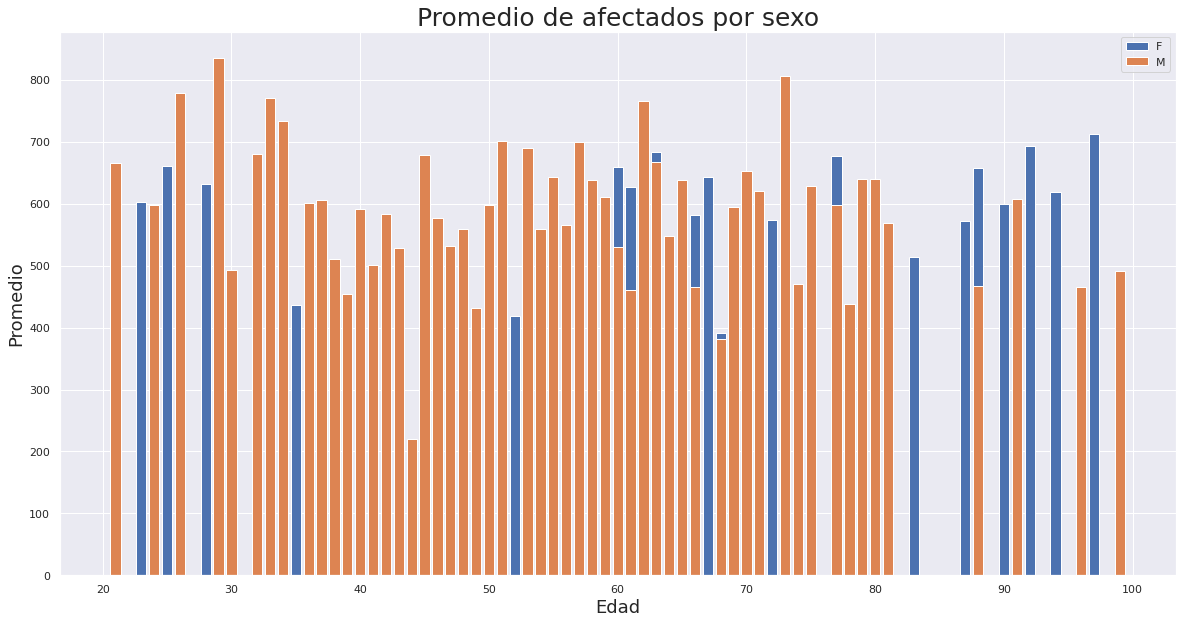

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(grouped_fem['Edad'], grouped_fem['amt'])
plt.bar(grouped_masc['Edad'], grouped_masc['amt'])
plt.legend(["F", "M"], loc ="upper right")
plt.title("Promedio de afectados por sexo" ,fontsize=25)
plt.xlabel('Edad',  fontsize = 18)
plt.ylabel('Promedio',  fontsize = 18)
plt.show
plt.xticks(rotation = 0)
plt.show

Del cuadro podemos advertir que en promedio, las mujeres recaen con meno frecuencia en fraudes y esto se va asentuando al pasar los años. Tambien podemos ver que a partir de los 80 años comienza una dispersion mucho mayor en los casos.

Analicemos ahora el horario de mayor afectacion acorde a cada edad. 

In [ ]:
grouped_df3 = df_fraud.groupby(['t_Hour'])['Edad'].median().reset_index()

<function matplotlib.pyplot.show(*args, **kw)>

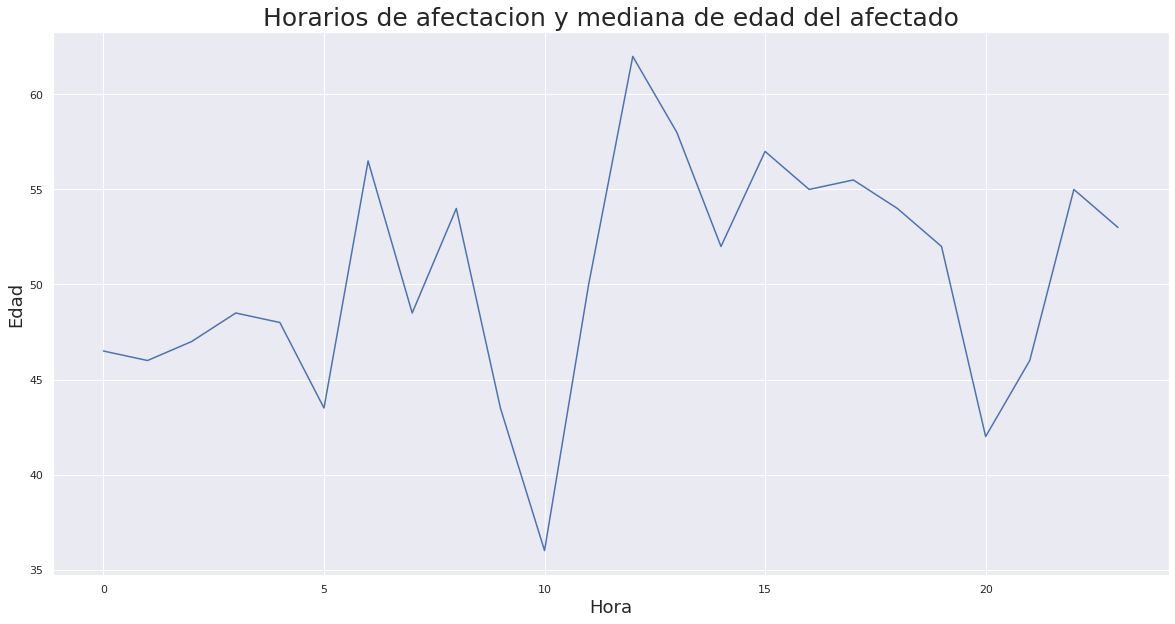

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(grouped_df3['t_Hour'], grouped_df3['Edad'])
plt.title("Horarios de afectacion y mediana de edad del afectado" ,fontsize=25)
plt.xlabel('Hora',  fontsize = 18)
plt.ylabel('Edad',  fontsize = 18)
plt.show
plt.xticks(rotation = 0)
plt.show

A las 12 hs podemos observar una mediana de edad bastante elevada, lo cual indicaria que las personas mayores eligen este horario para conectarse. De esta forma, podemos conocer a que hora debe cuidarse a cada uno de los publicos. A las 10  a las 20, la mediana de edad se encuentra baja, es en esos momentos que deberiamos concientizar a segmentos jovenes.

In [ ]:
grouped_df4 = df_fraud.groupby(['t_date'])['amt'].sum().reset_index()

In [ ]:
import plotly.express as px

Ahora analicemos el desarrollo crologico de los fraudes y sus montos

In [ ]:
df = grouped_df4
fig = px.line(df, x="t_date", y="amt" ,  width=1200, height=600)  
fig.update_layout(title_text='Montos evadidos a lo largo de los meses', title_x=0.5, title_font_size= 25)
fig.show()

El periodo que va de octubre a noviembre es el que ha presentado mayores picos. Tal vez sea importante invertir con enfasis en esos periodos para reducir esas perdidas. 

Ahora analicemos como han sido los montos de los fraudes respecto de los estados involucrados.

In [ ]:
grouped_df5 = df_fraud.groupby(['state','gender'])['amt'].sum().reset_index()
grouped_df5

,state,gender,amt
0,AK,M,11641.22
1,AL,F,19002.43
2,AL,M,17472.08
3,AR,F,6838.89
4,AR,M,9766.33
...,...,...,...
72,VA,M,35439.78
73,WA,F,15593.19
74,WI,F,14821.35
75,WI,M,25218.13


In [ ]:
df = grouped_df5
fig = px.bar(df, x="state", y="amt", color='gender', width=1200, height=600)
fig.update_layout(title_text='Estados involucrados', title_x=0.5 , title_font_size= 25 )
fig.show() 

De forma coincidente con nuestro rafico anterior, la cantidad de casos ue afectan a hombres es mayor. Mas alla de esto, podemos ver que hay estados en los que solo se regitro a mueres afectadas. 

Para finalizar, analizaremos la composicion etarea de cada mes con fraudes y como se compone el monto correspondiente.

In [ ]:
grouped_df6 = df_fraud.groupby(['Edad','t_Month'])['amt'].sum().reset_index()

In [ ]:
df = grouped_df6
fig = px.bar(df, x="t_Month", y="amt", color='Edad', width=1200, height=600)
fig.update_layout(title_text='Composición etarea por mes', title_x=0.5 , title_font_size= 25)
fig.show()

En este cuadro, podemos observar que agosto es el mes con mayor acumulacion de fraudes en cuanto a su monto. Notese que, si bien noviembre tenia mayores picos, agosto tiene mas dinero defraudado en su conjunto. 
Podemos observar en este mes que la edad mas afectada fue de 56 años y le sigue la edad de 28 años. 

In [ ]:
grouped_df7 = df1.groupby(['state','is_fraud'])['amt'].sum().reset_index()

In [ ]:
df = grouped_df7
fig = px.bar(df, x="state", y="amt", color='is_fraud', width=1200, height=600)
fig.update_layout(title_text='Estados involucrados', title_x=0.5 , title_font_size= 25 )
fig.show()

In [ ]:
grouped_df8 = df1.groupby(['job'])['amt'].mean().reset_index()
grouped_df8 = grouped_df8.sort_values(by='amt', ascending=False).head(20)

In [ ]:
df = grouped_df8
fig = px.bar(df, x="job", y="amt", width=1200, height=600)
fig.update_layout(title_text='Analisis de promedio de afectacion economica por profesión', title_x=0.5 , title_font_size= 25 )
fig.update_xaxes(tickangle=90)
fig.show()

##CONCLUSIÓN

El monto de las transacciones resulta vital para nuestro analisis y resulta realmente representativo para señalar cuales son los casos de fraude. Otra variable que resulta altamente representativa es la fecha de nacimiento que a traves de transformaciones nos brindara variables excelentes para la deteccion de fraude.

# 6 . INGENIERIA DE ATRIBUTOS

## Transformaciones

1. Transformaciones en DOB

In [ ]:
from datetime import date, time, datetime

In [ ]:
df1['datetime'] = pd.to_datetime(df1['dob'], )

In [ ]:
df1['d_Year'] = df1['datetime'].dt.year
df1['d_Month'] = df1['datetime'].dt.month
df1['d_Day'] = df1['datetime'].dt.day
df1['d_Hour'] = df1['datetime'].dt.hour
df1.drop(columns= ['dob','datetime' ], inplace=True) 

In [ ]:
df1.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'full_name', 'Edad', 'd_Year', 'd_Month',
       'd_Day', 'd_Hour'],
      dtype='object')

2. Drop

Realizamos un drop de las columnas que acorde a nuestro EDA, por su distribucion o por su composicion, no nos permiten incorporar información sistematica a nuestro modelo.

In [ ]:
df1.drop(columns= ['cc_num','merchant','first','last','street', 'city', 'state', 'job', 'trans_num', 'zip','unix_time', "full_name","long","lat"], inplace=True) 

3. TRANSFORMACIONES EN trans_date_trans_time


In [ ]:
df1.columns

Index(['trans_date_trans_time', 'category', 'amt', 'gender', 'city_pop',
       'merch_lat', 'merch_long', 'is_fraud', 'Edad', 'd_Year', 'd_Month',
       'd_Day', 'd_Hour'],
      dtype='object')

In [ ]:
df1['datetime'] = pd.to_datetime(df1['trans_date_trans_time'], )

In [ ]:
df1['t_Year'] = df1['datetime'].dt.year
df1['t_Month'] = df1['datetime'].dt.month
df1['t_Day'] = df1['datetime'].dt.day
df1['t_Hour'] = df1['datetime'].dt.hour
df1['t_WeekDate'] = df1['datetime'].dt.weekday
df1.drop(columns= ['trans_date_trans_time','datetime' ], inplace=True) 

Text(0.5, 1.0, 'Año')

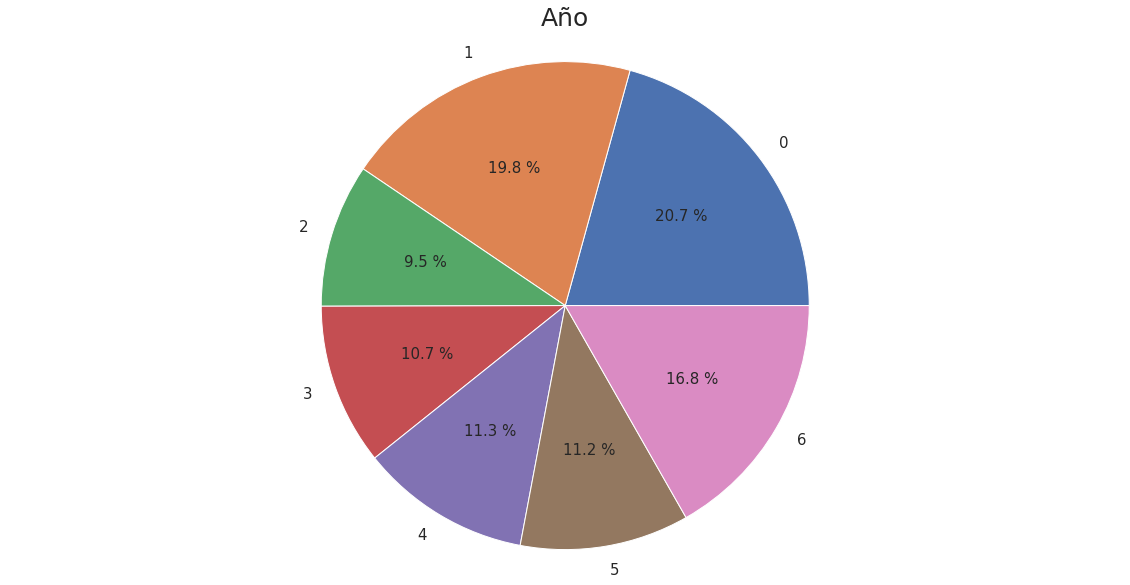

In [ ]:
grouped_WeekDate =  df1.groupby('t_WeekDate').category.count().to_frame('Cant').reset_index().rename(columns={'index':'hour'})
plt.figure(figsize=(20,10))
plt.pie(grouped_WeekDate['Cant'], labels=grouped_WeekDate['t_WeekDate'] , autopct="%0.1f %%" , textprops={'fontsize': 15} )
plt.axis("equal")
plt.title("Año" ,fontsize=25)

##Encoding de variables

1. Category

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore', drop = "first")
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df1[['category']]).toarray(),
                      columns = enc.get_feature_names_out())
# merge with main df bridge_df on key values
df1 = df1.join(enc_df)


In [ ]:
df1.drop(columns= ['category'], inplace=True) 

2. Gender

In [ ]:
df1.gender.replace({'M':0, 'F':1}, inplace = True)

3. WeekDate

In [ ]:
#creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore', drop = "first")
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df1[['t_WeekDate']]).toarray(), 
                      columns = enc.get_feature_names_out())
# merge with main df bridge_df on key values
df1 = df1.join(enc_df)

In [ ]:
df1.drop(columns= ['t_WeekDate'], inplace=True) 

In [ ]:
df1.columns

Index(['amt', 'gender', 'is_fraud', 'd_Year', 'd_Day', 'd_Hour', 't_Hour',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_kids_pets', 'category_misc_pos',
       'category_personal_care', 'category_travel', 't_WeekDate_1',
       't_WeekDate_2', 't_WeekDate_3', 't_WeekDate_4', 't_WeekDate_5',
       't_WeekDate_6'],
      dtype='object')

#7 . MODELO DE ML CON PCA

In [ ]:
df1.columns

Index(['amt', 'gender', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud',
       'Edad', 'd_Year', 'd_Month', 'd_Day', 'd_Hour', 't_Year', 't_Month',
       't_Day', 't_Hour', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       't_WeekDate_1', 't_WeekDate_2', 't_WeekDate_3', 't_WeekDate_4',
       't_WeekDate_5', 't_WeekDate_6'],
      dtype='object')

In [ ]:
#Separamos el Dataset para que solo tome en cuenta las variables continuas

X = df1[['Edad', 'amt', 'city_pop', 'merch_lat', 'merch_long', 'd_Year', 'd_Month', 'd_Day', 'd_Hour', 't_Year', 't_Month', 't_Day', 't_Hour']]
y = df1['is_fraud']

In [ ]:
#Separamos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Normalizamos los datos para que PCA funcione mejor!
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Aplicacion de PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Explicación de la varianza de las componentes
explained_variance = pca.explained_variance_ratio_
explained_variance


array([1.89745536e-01, 1.07482361e-01, 1.00496688e-01, 9.57522380e-02,
       9.23876409e-02, 8.91468343e-02, 8.56166498e-02, 8.36184150e-02,
       8.12452510e-02, 7.45083860e-02, 7.50034970e-31, 2.30500908e-34,
       4.41266817e-36])

In [ ]:
np.sum(explained_variance)

1.0

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo
model_rf = RandomForestClassifier(max_depth=10, random_state=42)
model_rf.fit(X_train, y_train)

# Predicción
y_pred = model_rf.predict(X_test)

In [ ]:
#Evaluación básica del modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('El accuracy del modelo es:', accuracy)

El accuracy del modelo es: 0.996176131864968


In [ ]:
predictions = model_rf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, predictions))

[[110718      0]
 [   425      1]]


#8 . MODELOS DE MACHINE LEARNING CON CROSSVALIDATION Y TUNING

##MODELO DE ML CON RANDOM FOREST 1

###MODELO INICIAL

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Separamos el Dataset para que solo tome en cuenta las variables continuas

X = df1[['Edad', 'amt', 'city_pop', 'merch_lat', 'merch_long', 'd_Year', 'd_Month', 'd_Day', 'd_Hour', 't_Year', 't_Month', 't_Day', 't_Hour']]
y = df1['is_fraud']

In [ ]:
#Separamos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Creación del modelo
model_rf = RandomForestClassifier(max_depth=10, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
predictions = model_rf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, predictions))

[[110709      9]
 [   243    183]]


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.95      0.43      0.59       426

    accuracy                           1.00    111144
   macro avg       0.98      0.71      0.80    111144
weighted avg       1.00      1.00      1.00    111144



<BarContainer object of 13 artists>

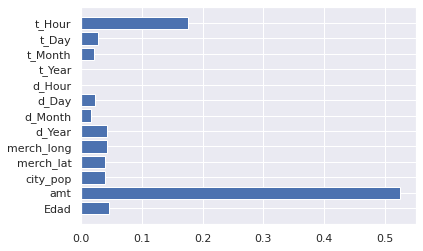

In [ ]:
plt.barh(X_test.columns, model_rf.feature_importances_)

###CROSSVALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model = RandomForestClassifier(max_depth=10, random_state=42)
model_scores = cross_val_score (model_rf, X_train, y_train, cv = 5, scoring="f1")
model_scores

array([0.50317125, 0.47912088, 0.54201681, 0.50107066, 0.52320675])

In [ ]:
model_scores.mean()

0.5097172696134555

## MODELO DE ML CON RANDOM FOREST 2

### MODELO INICIAL

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
#definición de X e y
X = df1.drop(columns= ["is_fraud"]) 
y = df1['is_fraud']

In [ ]:
#Separamos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Estrategia de Oversampling del trainset
oversample = RandomOverSampler(sampling_strategy=0.5)
y = y_train
X = X_train
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
#Estrategia de Undersampling del trainset
undersample = RandomUnderSampler(sampling_strategy='majority')
y = y_over
X = X_over
X_under, y_under = undersample.fit_resample(X, y)

In [ ]:
#Creación del modelo
clas = RandomForestClassifier(max_depth=10, random_state=42)
clas.fit(X_under, y_under)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
predictions = clas.predict(X_test)
print(Counter(y_test))

Counter({0: 110718, 1: 426})


In [ ]:
print(confusion_matrix(y_test, predictions))

[[108818   1900]
 [    33    393]]


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    110718
           1       0.17      0.92      0.29       426

    accuracy                           0.98    111144
   macro avg       0.59      0.95      0.64    111144
weighted avg       1.00      0.98      0.99    111144



<BarContainer object of 33 artists>

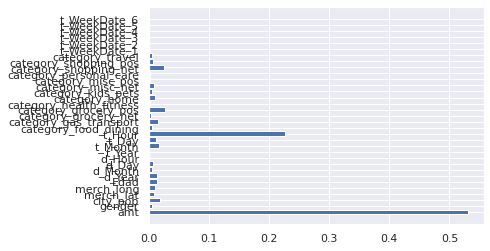

In [ ]:
plt.barh(X_under.columns, clas.feature_importances_)

###CROSSVALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model = RandomForestClassifier(max_depth=10, random_state=42)
model_scores = cross_val_score ( model, X_under, y_under, cv = 5, scoring="f1")

In [ ]:
model_scores

array([0.97098628, 0.97065763, 0.97463053, 0.97133718, 0.97114758])

In [ ]:
model_scores.mean()

0.9717518390764861

###HYPERTUNNING

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 2, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_under, y_under)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
def evaluate(model, X_under, y_under):
    predictions = model.predict(X_under)
    errors = abs(predictions - y_under)
    mape = 100 * np.mean(errors / y_under)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_under, y_under)
base_accuracy = evaluate(base_model, X_under, y_under)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_under, y_under)


Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.
Model Performance
Average Error: 0.0000 degrees.
Accuracy = -inf%.


In [ ]:
#Creación del modelo
clas = best_random
clas.fit(X_under, y_under)

RandomForestClassifier(max_depth=50, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=200)

In [ ]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [ ]:
rf_random.best_score_

0.9997087089257004

In [ ]:
predictions = clas.predict(X_test)
print(Counter(y_test))

Counter({0: 110718, 1: 426})


In [ ]:
print(confusion_matrix(y_test, predictions))

[[110700     18]
 [    77    349]]


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.95      0.82      0.88       426

    accuracy                           1.00    111144
   macro avg       0.98      0.91      0.94    111144
weighted avg       1.00      1.00      1.00    111144



##MODELO DE ML CON AdaBoostClassifier

###MODELO INICIAL

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
#definición de X e y
X = df1.drop(columns= ["is_fraud"]) 
y = df1['is_fraud']

In [ ]:
#Separamos en train y test
from sklearn.model_selection import train_test_split

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Estrategia de Oversampling del trainset
oversample = RandomOverSampler(sampling_strategy=0.5)
y = Y_train
X = X_train
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
#Estrategia de Undersampling del trainset
undersample = RandomUnderSampler(sampling_strategy='majority')
y = y_over
X = X_over
X_under, y_under = undersample.fit_resample(X, y)

In [ ]:
#Proceso de escalado
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_under)
X_test_sc = scaler.transform(X_validation)

In [ ]:
#Creación del modelo
modelo = AdaBoostClassifier(n_estimators=100,learning_rate=1, random_state=0, )
modelo.fit(X_train_sc, y_under)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=0)

In [ ]:
predictions = modelo.predict(X_test_sc)
print(Counter(Y_validation))

Counter({0: 110718, 1: 426})


In [ ]:
print(confusion_matrix(Y_validation, predictions))

[[105509   5209]
 [    26    400]]


In [ ]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98    110718
           1       0.07      0.94      0.13       426

    accuracy                           0.95    111144
   macro avg       0.54      0.95      0.55    111144
weighted avg       1.00      0.95      0.97    111144



<BarContainer object of 33 artists>

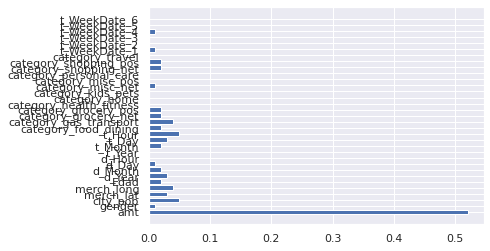

In [ ]:
plt.barh(X_under.columns, modelo.feature_importances_)

###CROSSVALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model = AdaBoostClassifier(n_estimators=100,learning_rate=1, random_state=0, )
model_scores = cross_val_score (model, X_under, y_under, cv = 5, scoring="f1")
model_scores

array([0.94765709, 0.94655916, 0.94782787, 0.94872028, 0.94736604])

In [ ]:
model_scores.mean()

0.9476260861853362

###HYPERTUNNING

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }


DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", max_depth = None, class_weight="balanced")

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
randomsearch_ABC = RandomizedSearchCV(ABC, param_distributions=param_grid, n_iter = 4, cv = 4, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
randomsearch_ABC.fit(X_under, y_under)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


RandomizedSearchCV(cv=4,
                   estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                      max_features='auto',
                                                                                      random_state=11)),
                   n_iter=4, n_jobs=-1,
                   param_distributions={'base_estimator__criterion': ['gini',
                                                                      'entropy'],
                                        'base_estimator__splitter': ['best',
                                                                     'random'],
                                        'n_estimators': [1, 2]},
                   random_state=42, verbose=2)

In [ ]:
def evaluate(model, X_under, y_under):
    predictions = model.predict(X_under)
    errors = abs(predictions - y_under)
    mape = 100 * np.mean(errors / y_under)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

base_model = AdaBoostClassifier(n_estimators=100,learning_rate=1, random_state=0, )
base_model.fit(X_under, y_under)
base_accuracy = evaluate(base_model, X_under, y_under)

best_random = randomsearch_ABC.best_estimator_
random_accuracy = evaluate(best_random, X_under, y_under)

Model Performance
Average Error: 0.0528 degrees.
Accuracy = -inf%.
Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.


In [ ]:
randomsearch_ABC.best_params_

{'n_estimators': 1,
 'base_estimator__splitter': 'best',
 'base_estimator__criterion': 'gini'}

In [ ]:
randomsearch_ABC.best_score_

0.9988393518434887

In [ ]:
#Creación del modelo
adab = best_random
adab.fit(X_under, y_under)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_features='auto',
                                                         random_state=11),
                   n_estimators=1)

In [ ]:
predictions = adab.predict(X_validation)
print(Counter(Y_validation))

Counter({0: 110718, 1: 426})


In [ ]:
print(confusion_matrix(Y_validation, predictions))

[[110532    186]
 [   105    321]]


In [ ]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.63      0.75      0.69       426

    accuracy                           1.00    111144
   macro avg       0.82      0.88      0.84    111144
weighted avg       1.00      1.00      1.00    111144



##MODELO DE ML CON XGBoostClassifier

###MODELO INICIAL

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
#definición de X e y
X = df1.drop(columns= ["is_fraud"]) 
y = df1['is_fraud']

In [ ]:
#Separamos en train y test
from sklearn.model_selection import train_test_split

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Estrategia de Oversampling del trainset
oversample = RandomOverSampler(sampling_strategy=0.5)
y = Y_train
X = X_train
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
#Estrategia de Undersampling del trainset
undersample = RandomUnderSampler(sampling_strategy='majority')
y = y_over
X = X_over
X_under, y_under = undersample.fit_resample(X, y)

In [ ]:
#Proceso de escalado
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_under)
X_test_sc = scaler.transform(X_validation)

In [ ]:
#Creación del modelo
modelo = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
modelo.fit(X_train_sc, y_under)

XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

In [ ]:
predictions = modelo.predict(X_test_sc)
print(Counter(Y_validation))

Counter({0: 110718, 1: 426})


In [ ]:
print(confusion_matrix(Y_validation, predictions))

[[107388   3330]
 [    18    408]]


In [ ]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    110718
           1       0.11      0.96      0.20       426

    accuracy                           0.97    111144
   macro avg       0.55      0.96      0.59    111144
weighted avg       1.00      0.97      0.98    111144



<BarContainer object of 33 artists>

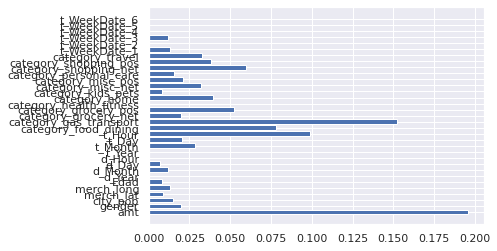

In [ ]:
plt.barh(X_under.columns, modelo.feature_importances_)

###CROSSVALIDATION 

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_scores = cross_val_score (model, X_under, y_under, cv = 5, scoring="f1")
model_scores

array([0.96369742, 0.96086991, 0.96092636, 0.96200312, 0.9615788 ])

In [ ]:
model_scores.mean()

0.9618151232007646

###HYPERTUNNING

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

params = { "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}


classifier = xgboost.XGBClassifier()

# run grid search
rs_model=RandomizedSearchCV(classifier,param_distributions=params,n_iter=3,scoring='roc_auc',n_jobs=-1,cv=2,verbose=3)

In [ ]:
#model fitting
rs_model.fit(X,y)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


RandomizedSearchCV(cv=2, estimator=XGBClassifier(), n_iter=3, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
 rs_model.best_estimator_

XGBClassifier(colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=10,
              min_child_weight=3)

In [ ]:
 rs_model.best_params_

{'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': 0.2,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [ ]:
 rs_model.best_score_

0.9999993891743707

In [ ]:
def evaluate(model, X_under, y_under):
    predictions = model.predict(X_under)
    errors = abs(predictions - y_under)
    mape = 100 * np.mean(errors / y_under)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

base_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
base_model.fit(X_under, y_under)
base_accuracy = evaluate(base_model, X_under, y_under)

best_random = rs_model.best_estimator_
random_accuracy = evaluate(best_random, X_under, y_under)

Model Performance
Average Error: 0.0388 degrees.
Accuracy = -inf%.
Model Performance
Average Error: 0.0000 degrees.
Accuracy = -inf%.


In [ ]:
#Creación del modelo
xgb = best_random
xgb.fit(X_under, y_under)

XGBClassifier(colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=10,
              min_child_weight=3)

In [ ]:
predictions = xgb.predict(X_validation)
print(Counter(Y_validation))

Counter({0: 110718, 1: 426})


In [ ]:
print(confusion_matrix(Y_validation, predictions))

[[110631     87]
 [    32    394]]


In [ ]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.82      0.92      0.87       426

    accuracy                           1.00    111144
   macro avg       0.91      0.96      0.93    111144
weighted avg       1.00      1.00      1.00    111144



##MODELO DE ML CON CatBoostClassifier

###MODELO INICIAL

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 14.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
#definición de X e y
X = df1.drop(columns= ["is_fraud"]) 
y = df1['is_fraud']

In [ ]:
#Separamos en train y test
from sklearn.model_selection import train_test_split

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Estrategia de Oversampling del trainset
oversample = RandomOverSampler(sampling_strategy=0.5)
y = Y_train
X = X_train
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
#Estrategia de Undersampling del trainset
undersample = RandomUnderSampler(sampling_strategy='majority')
y = y_over
X = X_over
X_under, y_under = undersample.fit_resample(X, y)

In [ ]:
#Proceso de escalado
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_under)
X_test_sc = scaler.transform(X_validation)

In [ ]:
#Creación del modelo
modelo = CatBoostClassifier(iterations=5,
                           learning_rate=0.1,
                           depth=10)
modelo.fit(X_train_sc, y_under)

0:	learn: 0.4910349	total: 504ms	remaining: 2.02s
1:	learn: 0.3720606	total: 1.05s	remaining: 1.58s
2:	learn: 0.2890337	total: 1.51s	remaining: 1.01s
3:	learn: 0.2319548	total: 1.93s	remaining: 483ms
4:	learn: 0.1956756	total: 2.37s	remaining: 0us


In [ ]:
predictions = modelo.predict(X_test_sc)
print(Counter(Y_validation))

Counter({0: 110718, 1: 426})


In [ ]:
print(confusion_matrix(Y_validation, predictions))

[[107371   3347]
 [    13    413]]


In [ ]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    110718
           1       0.11      0.97      0.20       426

    accuracy                           0.97    111144
   macro avg       0.55      0.97      0.59    111144
weighted avg       1.00      0.97      0.98    111144



<BarContainer object of 33 artists>

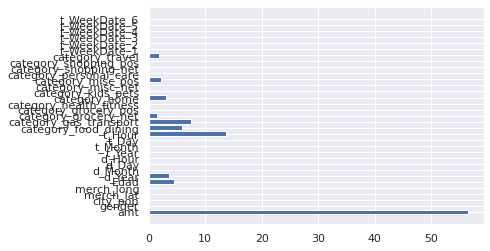

In [ ]:
plt.barh(X_under.columns, modelo.feature_importances_)

###CROSSVALIDATION 

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model = CatBoostClassifier(iterations=5,
                           learning_rate=0.1,
                           depth=10)
model_scores = cross_val_score (model, X_under, y_under, cv = 5, scoring="f1")
model_scores

0:	learn: 0.4997442	total: 178ms	remaining: 713ms
1:	learn: 0.3768621	total: 371ms	remaining: 556ms
2:	learn: 0.2995652	total: 555ms	remaining: 370ms
3:	learn: 0.2382283	total: 735ms	remaining: 184ms
4:	learn: 0.2003778	total: 917ms	remaining: 0us
0:	learn: 0.4845479	total: 482ms	remaining: 1.93s
1:	learn: 0.3658704	total: 1.02s	remaining: 1.53s
2:	learn: 0.2910483	total: 1.58s	remaining: 1.06s
3:	learn: 0.2337617	total: 2.15s	remaining: 538ms
4:	learn: 0.1939314	total: 2.72s	remaining: 0us
0:	learn: 0.4918427	total: 513ms	remaining: 2.05s
1:	learn: 0.3736504	total: 896ms	remaining: 1.34s
2:	learn: 0.2932623	total: 1.32s	remaining: 877ms
3:	learn: 0.2285663	total: 1.71s	remaining: 427ms
4:	learn: 0.1893646	total: 2.13s	remaining: 0us
0:	learn: 0.4800208	total: 479ms	remaining: 1.91s
1:	learn: 0.3618120	total: 761ms	remaining: 1.14s
2:	learn: 0.2876694	total: 1.16s	remaining: 773ms
3:	learn: 0.2377784	total: 1.57s	remaining: 394ms
4:	learn: 0.2000504	total: 2.1s	remaining: 0us
0:	learn:

array([0.96364752, 0.96316315, 0.96451837, 0.96046862, 0.96555331])

In [ ]:
model_scores.mean()

0.9634701944499715

###HYPERTUNNING

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

params = {'depth'         : sp_randInt(4, 10),
                  'learning_rate' : sp_randFloat(),
                  'iterations'    : sp_randInt(10, 100)
                 }

classifier = CatBoostClassifier()

# run grid search
rs_model=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=2,verbose=3)

In [ ]:
#model fitting
rs_model.fit(X,y)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
0:	learn: 0.1641292	total: 198ms	remaining: 17.2s
1:	learn: 0.1284966	total: 362ms	remaining: 15.5s
2:	learn: 0.0999912	total: 520ms	remaining: 14.7s
3:	learn: 0.0862725	total: 677ms	remaining: 14.2s
4:	learn: 0.0738993	total: 840ms	remaining: 13.9s
5:	learn: 0.0644089	total: 1.01s	remaining: 13.9s
6:	learn: 0.0573232	total: 1.19s	remaining: 13.8s
7:	learn: 0.0462861	total: 1.38s	remaining: 13.8s
8:	learn: 0.0399152	total: 1.55s	remaining: 13.6s
9:	learn: 0.0370570	total: 1.71s	remaining: 13.3s
10:	learn: 0.0325293	total: 1.89s	remaining: 13.2s
11:	learn: 0.0285667	total: 2.07s	remaining: 13.1s
12:	learn: 0.0259022	total: 2.24s	remaining: 12.9s
13:	learn: 0.0243299	total: 2.41s	remaining: 12.7s
14:	learn: 0.0225053	total: 2.58s	remaining: 12.6s
15:	learn: 0.0210340	total: 2.76s	remaining: 12.4s
16:	learn: 0.0188802	total: 2.94s	remaining: 12.3s
17:	learn: 0.0177020	total: 3.28s	remaining: 12.8s
18:	learn: 0.0162666	total: 3.71

RandomizedSearchCV(cv=2,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f020f0a6c70>,
                   n_iter=5, n_jobs=-1,
                   param_distributions={'depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f020f0a6ee0>,
                                        'iterations': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f020f4c0d60>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f020f05cc40>},
                   scoring='roc_auc', verbose=3)

In [ ]:
 rs_model.best_params_

{'depth': 8, 'iterations': 88, 'learning_rate': 0.7835724295293492}

In [ ]:
 rs_model.best_score_

0.9999714010253373

In [ ]:
predictions = rs_model.predict(X_validation)
print(Counter(Y_validation))

Counter({0: 110718, 1: 426})


In [ ]:
print(confusion_matrix(Y_validation, predictions))

[[110572    146]
 [    44    382]]


In [ ]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.72      0.90      0.80       426

    accuracy                           1.00    111144
   macro avg       0.86      0.95      0.90    111144
weighted avg       1.00      1.00      1.00    111144



##MODELO DE ML CON LOGISTIC REGRESSION

###MODELO INICIAL

In [ ]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.linear_model import LogisticRegression

In [ ]:
df1.columns

Index(['amt', 'gender', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud',
       'Edad', 'd_Year', 'd_Month', 'd_Day', 'd_Hour', 't_Year', 't_Month',
       't_Day', 't_Hour', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       't_WeekDate_1', 't_WeekDate_2', 't_WeekDate_3', 't_WeekDate_4',
       't_WeekDate_5', 't_WeekDate_6'],
      dtype='object')

In [ ]:
#definición de X e y
X = df1.drop(columns= ["is_fraud"]) 
y = df1['is_fraud']

In [ ]:
#Creamos el conjunto de entrenamiento y validacion/testeo
validation_size = 0.20
seed = 2
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [ ]:
#Estrategia de Oversampling del trainset
oversample = RandomOverSampler(sampling_strategy=0.5)
y = Y_train
X = X_train
X_over, y_over = oversample.fit_resample(X, y)


In [ ]:
print(Counter(y))

Counter({0: 442838, 1: 1737})


In [ ]:
print(Counter(y_over))

Counter({0: 442838, 1: 221419})


In [ ]:
#Estrategia de Undersampling del trainset
undersample = RandomUnderSampler(sampling_strategy='majority')
y = y_over
X = X_over
X_under, y_under = undersample.fit_resample(X, y)

In [ ]:
print(Counter(y_under))

Counter({0: 221419, 1: 221419})


In [ ]:
#Proceso de escalado
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_under)
X_test_sc = scaler.transform(X_validation)

In [ ]:
#Creación del modelo
model = LogisticRegression(random_state=2)
model.fit(X_train_sc, y_under)

LogisticRegression(random_state=2)

In [ ]:
predictions = model.predict(X_test_sc)

In [ ]:
print(Counter(Y_validation))

Counter({0: 110736, 1: 408})


In [ ]:
print(accuracy_score(Y_validation, predictions))

0.8846181530267041


In [ ]:
print(confusion_matrix(Y_validation, predictions))

[[98020 12716]
 [  108   300]]


In [ ]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94    110736
           1       0.02      0.74      0.04       408

    accuracy                           0.88    111144
   macro avg       0.51      0.81      0.49    111144
weighted avg       1.00      0.88      0.94    111144



Feature: 0, Score: 3.98032
Feature: 1, Score: 0.17922
Feature: 2, Score: -0.15431
Feature: 3, Score: 0.05475
Feature: 4, Score: -0.06253
Feature: 5, Score: -0.00008
Feature: 6, Score: 0.00008
Feature: 7, Score: -0.04928
Feature: 8, Score: 0.01510
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: -0.25189
Feature: 12, Score: -0.24963
Feature: 13, Score: 0.43915
Feature: 14, Score: 0.34123
Feature: 15, Score: 0.99087
Feature: 16, Score: 0.51528
Feature: 17, Score: 0.96361
Feature: 18, Score: 0.39289
Feature: 19, Score: 0.22620
Feature: 20, Score: 0.42760
Feature: 21, Score: -0.14400
Feature: 22, Score: 0.47902
Feature: 23, Score: 0.46750
Feature: 24, Score: -0.66049
Feature: 25, Score: -0.46555
Feature: 26, Score: 0.37303
Feature: 27, Score: -0.01971
Feature: 28, Score: 0.14194
Feature: 29, Score: 0.22532
Feature: 30, Score: 0.21084
Feature: 31, Score: 0.13492
Feature: 32, Score: 0.12493


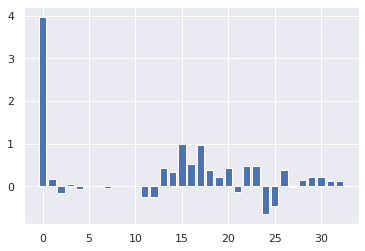

In [ ]:
from matplotlib import pyplot
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

###CROSSVALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model_scores = cross_val_score(model, X_train_sc, y_under, cv = 5, scoring="f1")
model_scores

array([0.8166557 , 0.81688045, 0.81768526, 0.8162937 , 0.81907651])

In [ ]:
model_scores.mean()

0.8173183247081232

###MODELO SIN COLUMNAS DE IMPORTANCIA NEGATIVA

In [ ]:
X_train.columns

Index(['amt', 'gender', 'city_pop', 'merch_lat', 'merch_long', 'Edad',
       'd_Year', 'd_Month', 'd_Day', 'd_Hour', 't_Year', 't_Month', 't_Day',
       't_Hour', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       't_WeekDate_1', 't_WeekDate_2', 't_WeekDate_3', 't_WeekDate_4',
       't_WeekDate_5', 't_WeekDate_6'],
      dtype='object')

In [ ]:
df1.drop(columns= ['city_pop', 'merch_lat', 'merch_long','Edad','d_Month','t_Month', 't_Day','t_Year','category_home', 'category_misc_net', 'category_shopping_net','category_shopping_pos'], inplace=True) 

In [ ]:
df1.columns

Index(['amt', 'gender', 'is_fraud', 'd_Year', 'd_Day', 'd_Hour', 't_Hour',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_kids_pets', 'category_misc_pos',
       'category_personal_care', 'category_travel', 't_WeekDate_1',
       't_WeekDate_2', 't_WeekDate_3', 't_WeekDate_4', 't_WeekDate_5',
       't_WeekDate_6'],
      dtype='object')

In [ ]:
#definición de X e y
X = df1.drop(columns= ["is_fraud"]) 
y = df1['is_fraud']

In [ ]:
#Creamos el conjunto de entrenamiento y validacion/testeo
validation_size = 0.20
seed = 2
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [ ]:
#Estrategia de Oversampling del trainset
oversample = RandomOverSampler(sampling_strategy=0.5)
y = Y_train
X = X_train
X_over, y_over = oversample.fit_resample(X, y)


In [ ]:
print(Counter(y))

Counter({0: 442838, 1: 1737})


In [ ]:
print(Counter(y_over))

Counter({0: 442838, 1: 221419})


In [ ]:
#Estrategia de Undersampling del trainset
undersample = RandomUnderSampler(sampling_strategy='majority')
y = y_over
X = X_over
X_under, y_under = undersample.fit_resample(X, y)

In [ ]:
print(Counter(y_under))

Counter({0: 221419, 1: 221419})


In [ ]:
#Proceso de escalado
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_under)
X_test_sc = scaler.transform(X_validation)

In [ ]:
#Creación del modelo
model = LogisticRegression(random_state=2)
model.fit(X_train_sc, y_under)

LogisticRegression(random_state=2)

In [ ]:
predictions = model.predict(X_test_sc)

In [ ]:
print(Counter(Y_validation))

Counter({0: 110736, 1: 408})


In [ ]:
print(accuracy_score(Y_validation, predictions))

0.8844292089541496


In [ ]:
print(confusion_matrix(Y_validation, predictions))

[[98011 12725]
 [  120   288]]


In [ ]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94    110736
           1       0.02      0.71      0.04       408

    accuracy                           0.88    111144
   macro avg       0.51      0.80      0.49    111144
weighted avg       1.00      0.88      0.94    111144



Feature: 0, Score: 3.48726
Feature: 1, Score: 0.19751
Feature: 2, Score: -0.00392
Feature: 3, Score: -0.00114
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.50007
Feature: 6, Score: 0.30040
Feature: 7, Score: 0.92704
Feature: 8, Score: 0.48380
Feature: 9, Score: 0.97429
Feature: 10, Score: 0.33235
Feature: 11, Score: 0.35909
Feature: 12, Score: 0.42980
Feature: 13, Score: 0.40502
Feature: 14, Score: 0.33420
Feature: 15, Score: -0.02224
Feature: 16, Score: 0.13003
Feature: 17, Score: 0.20857
Feature: 18, Score: 0.21303
Feature: 19, Score: 0.12598
Feature: 20, Score: 0.13268


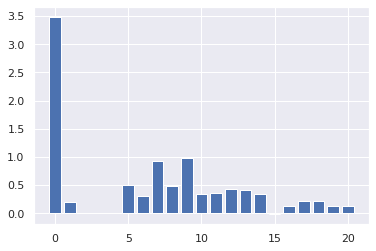

In [ ]:
from matplotlib import pyplot
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

###CROSSVALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model_scores = cross_val_score(model, X_train_sc, y_under, cv = 5, scoring="f1")
model_scores

array([0.79913948, 0.79800954, 0.79775144, 0.79649457, 0.79876387])

In [ ]:
model_scores.mean()

0.7980317804842492

# 9 . SELECCION DEL MEJOR MODELO

## Macro AVG f1-score de cada modelo


1.   RamdomForestClassifier 1: 0,80
2.   RandomForestClassifier 2: 0,94
3.   AdaBoostClassifier: 0,84
4.   XGBoostClassifier: 0,93
5.   CatBoostClassifier: 0,90
6.   LogisticRegression: 0,49

Los tres mejores modelos son RandomForestClassifier2, XGBoostClassifier y CatBoostClassifier. Analcemos ahora sus matrices de confusión para averiguar cual es el modelo mas adecuado para la detección de fraudes.




##Analisis de matrices de confusion 

En primer lugar, tenemos que analizar que implica cada elemento de la matriz de confusión para la investigacion de fraude. 

1.   Verdaderos Positivos: Son aquellas operaciones en las que el sistema dijo que no eran fraude y tuvo razon. Es el numero mas grande pero no genera indicios claro del funcionamiento de nuestro modelo.
2.   Falsos Negativos: Aquellas operaciones en las que nuestro modelo falló e identifico una operacion como no fraudulenta aun cuando esta si lo era. Este es uno de los datos mas relevantes porque equivale a la impunidad del criminal que pasa por encima de nuestro sistema. 
3.   Falsos Positivos: Son aquellos casos en los que el sistema predijo una situacion de fraude de forma erronea. Este es el segundo punto de relevancia para nuestro analisis. Un numero elevado de falsos positivos genera un exceso de trabajo sobre los analistas que podria derivar nuevamente en errores y abrir camino a la impunidad a causa del error humano.
4.   Verdaderos Negativos:Aquellos cosos en los que se predijo la existencia de un fraude y esto efectivamente ocurrió. Tambien resulta relevante para evaluar la eficiencia del modelo ya que es el objetivo directo de la actividad. 





Matriz de RandomforestClassifier

[[110700       18]

 [    77    349]]

Matriz de XGBoostClassifier

 [[110631      87]

 [    32    394]]

 Matriz de CatBoostClassifier

 [[110572    146]
 
 [    44    382]]

El modelo que mejor se comporto para nuestra finalidad fue el XGBoostClassifier. Si bien fue mas impreciso que el RamdomForestClassifier en terminos de falsos positivos, la cantidad de 118 no resulta descabellada en un dataset de esa magnitud y resulta una cifra manejable para los analistas. 
Por otro lado, tanto el numero de verdaderos negativos como el de falsos negativos advierte que el modelo ha detectado una gran porcion de los casos de fraude equivandose en una cantidad menor a la de los demas. Si bien, ningun numero de fraudes resulta tolerable, este es el modelo que mejor ha combatido este problema. 

# 10 . CREACION DE PICKLE CON EL MEJOR MODELO

In [ ]:
import pickle

In [ ]:
BestModel = xgb
pickle_file = open('BestModel.pickle', 'wb')
pickle.dump(BestModel, pickle_file)